In [1]:
"""
Initialization cell
"""
import EDTwoElectron2DHarmonicAtomModuleCOMandRelBasis as ed
import continuumModelBandsModule as cmb
import numpy as np
import scipy as sp
import matplotlib as mpl
import proplot as pplt
import matplotlib.pyplot as plt
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (3.375,2.5)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams["savefig.jpeg_quality"]
#plt.rcParams['figure.constrained_layout.use'] = True
mpl.rcParams['text.usetex']= True
from mpl_toolkits.mplot3d import Axes3D
import mpmath as mp
import math
from numba import njit

figSaveDir='/Users/aidanreddy/Desktop/TwistedTMD/paperFigures/'

from datetime import date
today = date.today()
date = today.strftime("%b%d%Y")

pplt.rc['grid'] = False


hbar = 6.582 * 10**(-13) # meV * s
#static, bulk dielectric tensor components of hBN from npj 2D Materials and Applications (2018) 2:6 ; doi:10.1038/s41699-018-0050-x
epsilonPerp = 3.76
epsilonPar = 6.93
epsilonEff = math.sqrt(epsilonPar*epsilonPerp)
epsilonEffD = math.sqrt(epsilonPar/epsilonPerp)
dielectricConstant = epsilonEff
electronMass = 5.856301 * 10**(-29) # meV *(second/Å)
eSquaredOvere0 =  14400 #meV * angstrom
WattSecondsPermeV = 1.602 * 10**(-22)
Kb = 0.08617 # meV per Kelvin
SquareMetersPerSqareAngstrom = 10**(-20)

eSquaredOvere0 =  14400 #meV * angstrom
hbar = 6.582 * 10**(-13) # meV * s
electronMass = 5.856301 * 10**(-29) # meV *(second/Å)
JoulesPermeV = 1.602 * 10**(-22)
SquareMetersPerSqareAngstrom = 10**(-20)
Kb = 0.08617 # meV per Kelvin

epsilonPerp = 3.76
epsilonPar = 6.93
epsilonEff = math.sqrt(epsilonPar*epsilonPerp)
epsilonEffD = math.sqrt(epsilonPar/epsilonPerp)

material = 'MoS2'

modStrengthFactor = 1

if material == 'WS2':
    a0 = 3.18
    mStar = 0.87 * electronMass
    V1 = 33.5* modStrengthFactor
    V2 = 4.0* modStrengthFactor
    V3 = 5.5* modStrengthFactor

if material == 'MoS2':
    a0 = 3.182 # atomic lattice constant in Å
    V1 = 39.45 * modStrengthFactor #meV
    V2 = 6.5 * modStrengthFactor #meV
    V3 = 10.0 * modStrengthFactor #meV
    mStar = 0.9 * electronMass

dielectricConstant = epsilonEff

def computeParameters(theta):
    aM = a0*(180/np.pi)/theta # angstroms
    gamma = 8*(np.pi**2)*(V1-6*V2+4*V3) # meV
    print(gamma)
    hbaromega = hbar*np.sqrt(gamma/mStar)/aM # sqrt(meV/electron mass)/angstrom
    l = np.sqrt(hbar**2/(mStar*hbaromega))
    coulombEnergy = eSquaredOvere0/(dielectricConstant*l)
    coulombToConfinementRatio = coulombEnergy/hbaromega
    interAtomCoulomb = eSquaredOvere0/(dielectricConstant*(aM/np.sqrt(3)))
    coulombRatio = coulombEnergy/interAtomCoulomb
    return(aM, gamma, hbaromega, l, coulombEnergy, interAtomCoulomb, coulombRatio, coulombToConfinementRatio)

/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipykernel_99168/3857201298.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  deltan = (i+1)*(np.exp((i-mu)/T)+1)**(-1)
/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipykernel_99168/3857201298.py:30: RuntimeWarning: overflow encountered in exp
  deltan = (i+1)*(np.exp((i-mu)/T)+1)**(-1)
No handles with labels found to put in legend.


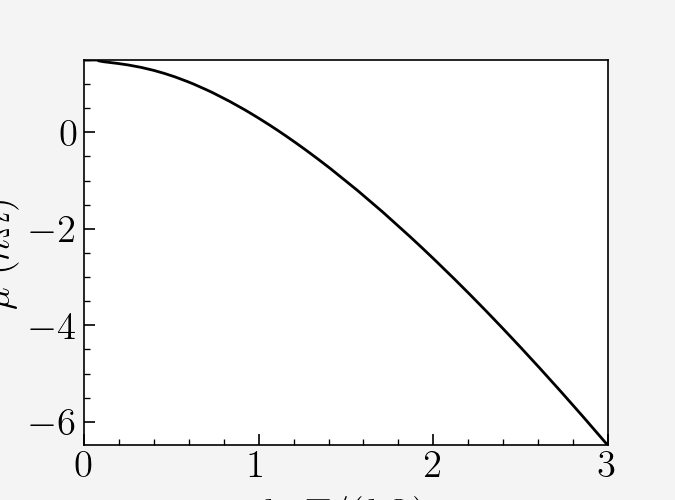

/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipykernel_99168/3857201298.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  fermi = (np.exp(np.real((E - mu)/(T))) + 1)**(-1)
/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipykernel_99168/3857201298.py:73: RuntimeWarning: invalid value encountered in double_scalars
  thermalMatrixFixedN[TcIndex][ThIndex] += computeThermalFactors(Th, Tc, muh, muc, 0, 1)/(Th - Tc)
/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipykernel_99168/3857201298.py:74: RuntimeWarning: invalid value encountered in double_scalars
  thermalMatrixFixedMu[TcIndex][ThIndex] += computeThermalFactors(Th, Tc, MuOfTVector[1], MuOfTVector[1], 0, 1)/(Th - Tc)
/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipykernel_99168/3857201298.py:73: RuntimeWarning: divide by zero encountered in double_scalars
  thermalMatrixFixedN[TcIndex][ThIndex] += computeThermalFactors(Th, Tc, muh, muc, 0, 1)/(Th - Tc)
/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipyke

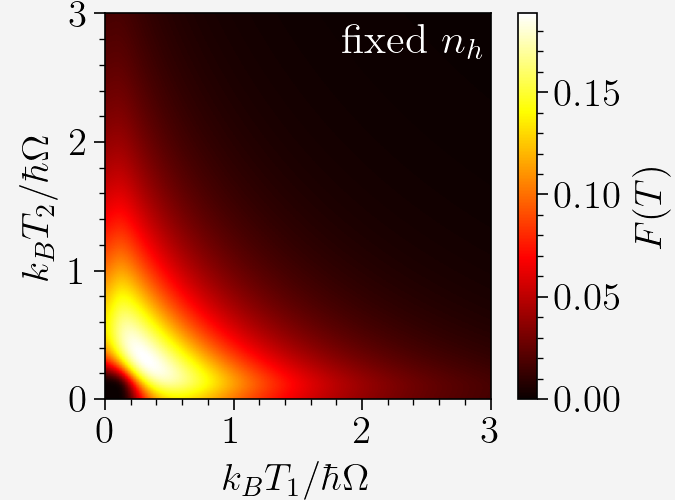

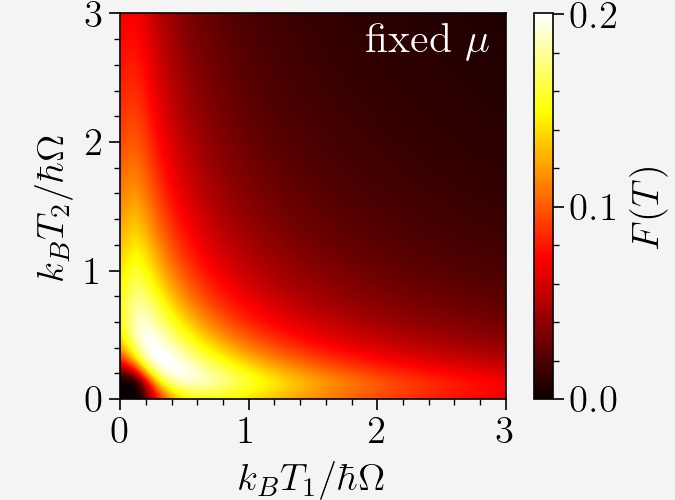

/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipykernel_99168/3857201298.py:128: RuntimeWarning: invalid value encountered in true_divide
  ratioMatrix = thermalMatrixFixedMu/thermalMatrixFixedN


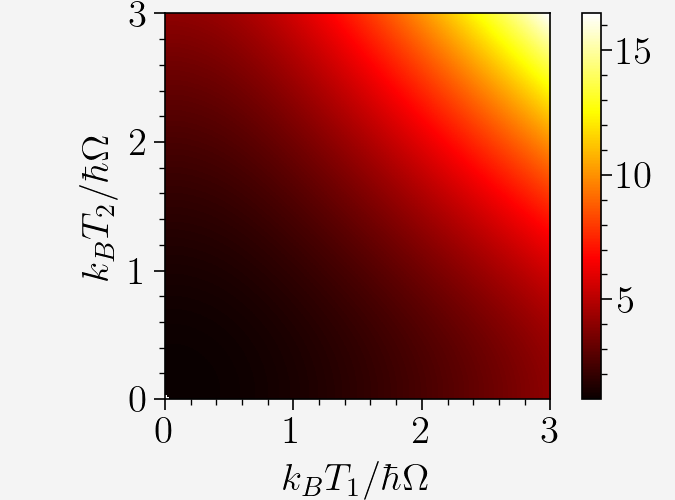

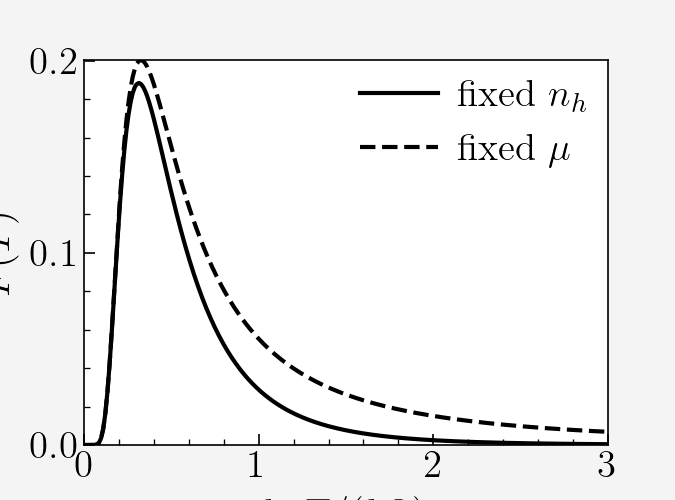

In [107]:
"""
Mu of T in harmonic oscillator approximation
"""

NMax = 200

TMax = 3

TVals = np.linspace(0, TMax, 250)

def computeMuOfTVector(TVals = TVals):
    numTVals = np.shape(TVals)[0]
    n = 1
    #update N calculation to account for symmetry reduction weighting
    MuOfTVector = np.zeros(numTVals)
    for TIndex, T in np.ndenumerate(TVals):
        TIndex = TIndex[0]
        if TIndex == 0:
            trialMu = 0.5
        elif TIndex != 0:
            trialMu = MuOfTVector[TIndex-1]
        nFound = False
        while nFound == False:
            trialn = MuTtoN(trialMu, T)
            nFound = np.isclose(trialn,n, 10**(-3))
            trialMu -= 0.001
        MuOfTVector[TIndex] = trialMu+0.001
    return(MuOfTVector)

def MuTtoN(mu, T, NMax=NMax):
    n = 0
    for i in range(NMax):
        #deltan = (i+1)*(i+2)*(i+3)*(1/6)*(np.exp((i-mu)/T)+1)**(-1)
        deltan = (i+1)*(np.exp((i-mu)/T)+1)**(-1)
        n += deltan
    return(n)

#set of 1.5 constant if doing fixed mu

MuOfTVector = computeMuOfTVector()

fig, ax = plt.subplots()

ax.plot(TVals, MuOfTVector+1, color = 'black', linewidth = '1')
ax.tick_params(direction = "in")
ax.tick_params(which = 'minor', direction = "in")
plt.margins(0)
ax.set(xlabel=r'$k_{B}T/(\hbar\Omega)$', ylabel=r'$\mu$ $(\hbar\Omega)$')
plt.legend(frameon=False)
plt.savefig(figSaveDir+'MuofTFixedNHarmonicOscillatorModel%s.pdf' % date, bbox_inches='tight')

plt.show()

"""
Now, plot Detailed Balance T_i T_j Contour taking this into account
"""

def fermi(E, T, mu):
    fermi = (np.exp(np.real((E - mu)/(T))) + 1)**(-1)
    return(fermi)

def computeThermalFactors(Th, Tc, muh, muc, band1, band2):
    thermalFactors = fermi(band2, Th, muh)*(1-fermi(band1, Th, muh))*fermi(band1, Tc, muc)*(1-fermi(band2, Tc, muc))-fermi(band1, Th, muh)*(1-fermi(band2, Th, muh))*fermi(band2, Tc, muc)*(1-fermi(band1, Tc, muc))
    return(thermalFactors)

thermalMatrixFixedN = np.zeros((np.shape(TVals)[0],np.shape(TVals)[0]))
thermalMatrixFixedMu = np.zeros((np.shape(TVals)[0],np.shape(TVals)[0]))


#if band1 < band2:
for TcIndex in range(np.shape(TVals)[0]):
    Tc = TVals[TcIndex]
    muc = MuOfTVector[TcIndex]
    for ThIndex in range(np.shape(TVals)[0]):
        Th = TVals[ThIndex]
        muh = MuOfTVector[ThIndex]
        thermalMatrixFixedN[TcIndex][ThIndex] += computeThermalFactors(Th, Tc, muh, muc, 0, 1)/(Th - Tc)
        thermalMatrixFixedMu[TcIndex][ThIndex] += computeThermalFactors(Th, Tc, MuOfTVector[1], MuOfTVector[1], 0, 1)/(Th - Tc)


for i in range(np.shape(thermalMatrixFixedN)[0]):
    if i==0:
        thermalMatrixFixedN[i,i] = thermalMatrixFixedN[i, i+1]
        thermalMatrixFixedMu[i,i] = thermalMatrixFixedMu[i, i+1]
    if i==(np.shape(thermalMatrixFixedN)[0]-1):
        thermalMatrixFixedN[i,i] = thermalMatrixFixedN[i, i-1]
        thermalMatrixFixedMu[i,i] = thermalMatrixFixedMu[i, i-1]
    else:
        thermalMatrixFixedN[i,i] = (thermalMatrixFixedN[i, i-1] + thermalMatrixFixedN[i, i+1])/2
        thermalMatrixFixedMu[i,i] = (thermalMatrixFixedMu[i, i-1] + thermalMatrixFixedMu[i, i+1])/2

thermalMatrixFixedN[0,0] = 0
thermalMatrixFixedMu[0,0] = 0


numPoints = np.shape(TVals)[0]

fig, ax = plt.subplots()

imshow = ax.imshow(thermalMatrixFixedN, cmap = 'hot',origin = 'lower', extent = [0,TMax,0,TMax])
plt.xlabel(r'$k_{B}T_{1}/\hbar\Omega$')
plt.ylabel(r'$k_{B}T_{2}/\hbar\Omega$')
ax.set_aspect('equal', adjustable='box')
plt.title('fixed $n_{h}$', y=1.0, x=0.8,pad=-14, color='white')
cbar = plt.colorbar(imshow) 
cbar.ax.set_ylabel(r'$F(T)$')
plt.tight_layout(pad = 0)
plt.margins(0)
#plt.axis('square')
#plt.title('fixed $\mu$')
plt.savefig(figSaveDir+'thermalFactorsTwoLevelFIXEDN%s.pdf' % date, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()

imshow = ax.imshow(thermalMatrixFixedMu, cmap = 'hot',origin = 'lower', extent = [0,TMax,0,TMax])
plt.xlabel(r'$k_{B}T_{1}/\hbar\Omega$')
plt.ylabel(r'$k_{B}T_{2}/\hbar\Omega$')
ax.set_aspect('equal', adjustable='box')
plt.title('fixed $\mu$', y=1.0, x=0.8,pad=-14, color ='white')
cbar = plt.colorbar(imshow) 
cbar.ax.set_ylabel(r'$F(T)$')
plt.tight_layout(pad = 0)
plt.margins(0)
#plt.axis('square')
#plt.title('fixed $\mu$')
plt.savefig(figSaveDir+'thermalFactorsTwoLevelFIXEDMu%s.pdf' % date, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()

ratioMatrix = thermalMatrixFixedMu/thermalMatrixFixedN
imshow = ax.imshow(ratioMatrix, cmap = 'hot',origin = 'lower', extent = [0,TMax,0,TMax])
plt.xlabel(r'$k_{B}T_{1}/\hbar\Omega$')
plt.ylabel(r'$k_{B}T_{2}/\hbar\Omega$')
ax.set_aspect('equal', adjustable='box')
cbar = plt.colorbar(imshow) 
plt.tight_layout(pad = 0)
plt.margins(0)
#plt.axis('square')
#plt.title('fixed $\mu$')
plt.show()

fig, ax = plt.subplots()
ax.plot(TVals, np.diagonal(thermalMatrixFixedN), color ='black', label = 'fixed $n_h$')
ax.plot(TVals, np.diagonal(thermalMatrixFixedMu), color ='black', linestyle='dashed', label = 'fixed $\mu$')
ax.set(xlabel=r'$k_{B}T/(\hbar\Omega)$', ylabel = r'$F(T)$')
ax.legend(frameon=False)
ax.tick_params(direction = "in")
ax.tick_params(which = 'minor', direction = "in")
ax.margins(0)

plt.savefig(figSaveDir+'TLineCutOfTwoLevelThermalFactorsfixedMuVsFixedN.pdf', bbox_inches='tight')

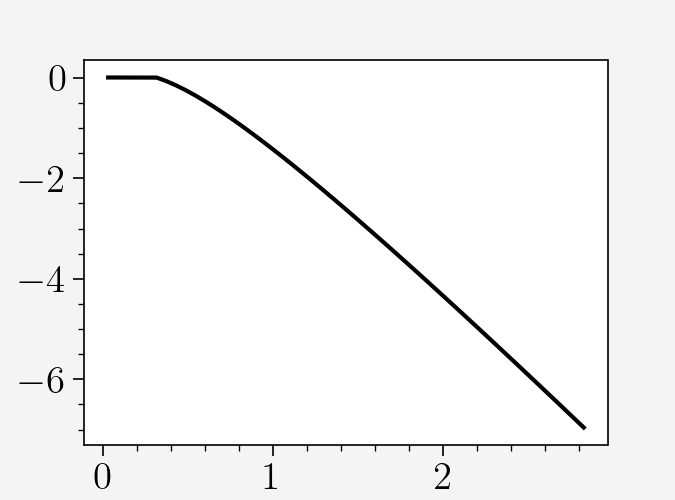

In [285]:
"""
Acutal mu of T from my full continuum model numerical calculations
"""
TVals = np.linspace(10,990,50)

muofT= -np.load('MuOfTVectorMoS2Apr182022N=7Shells=4Hbareta=1.00Theta=1.0nu=2energy0,200,500Ef=0TVals=10,990,50ModFactor=1Epsilon=5.104586173236768.npy')

plt.plot(TVals/(28/0.08), muofT/28, color='black')

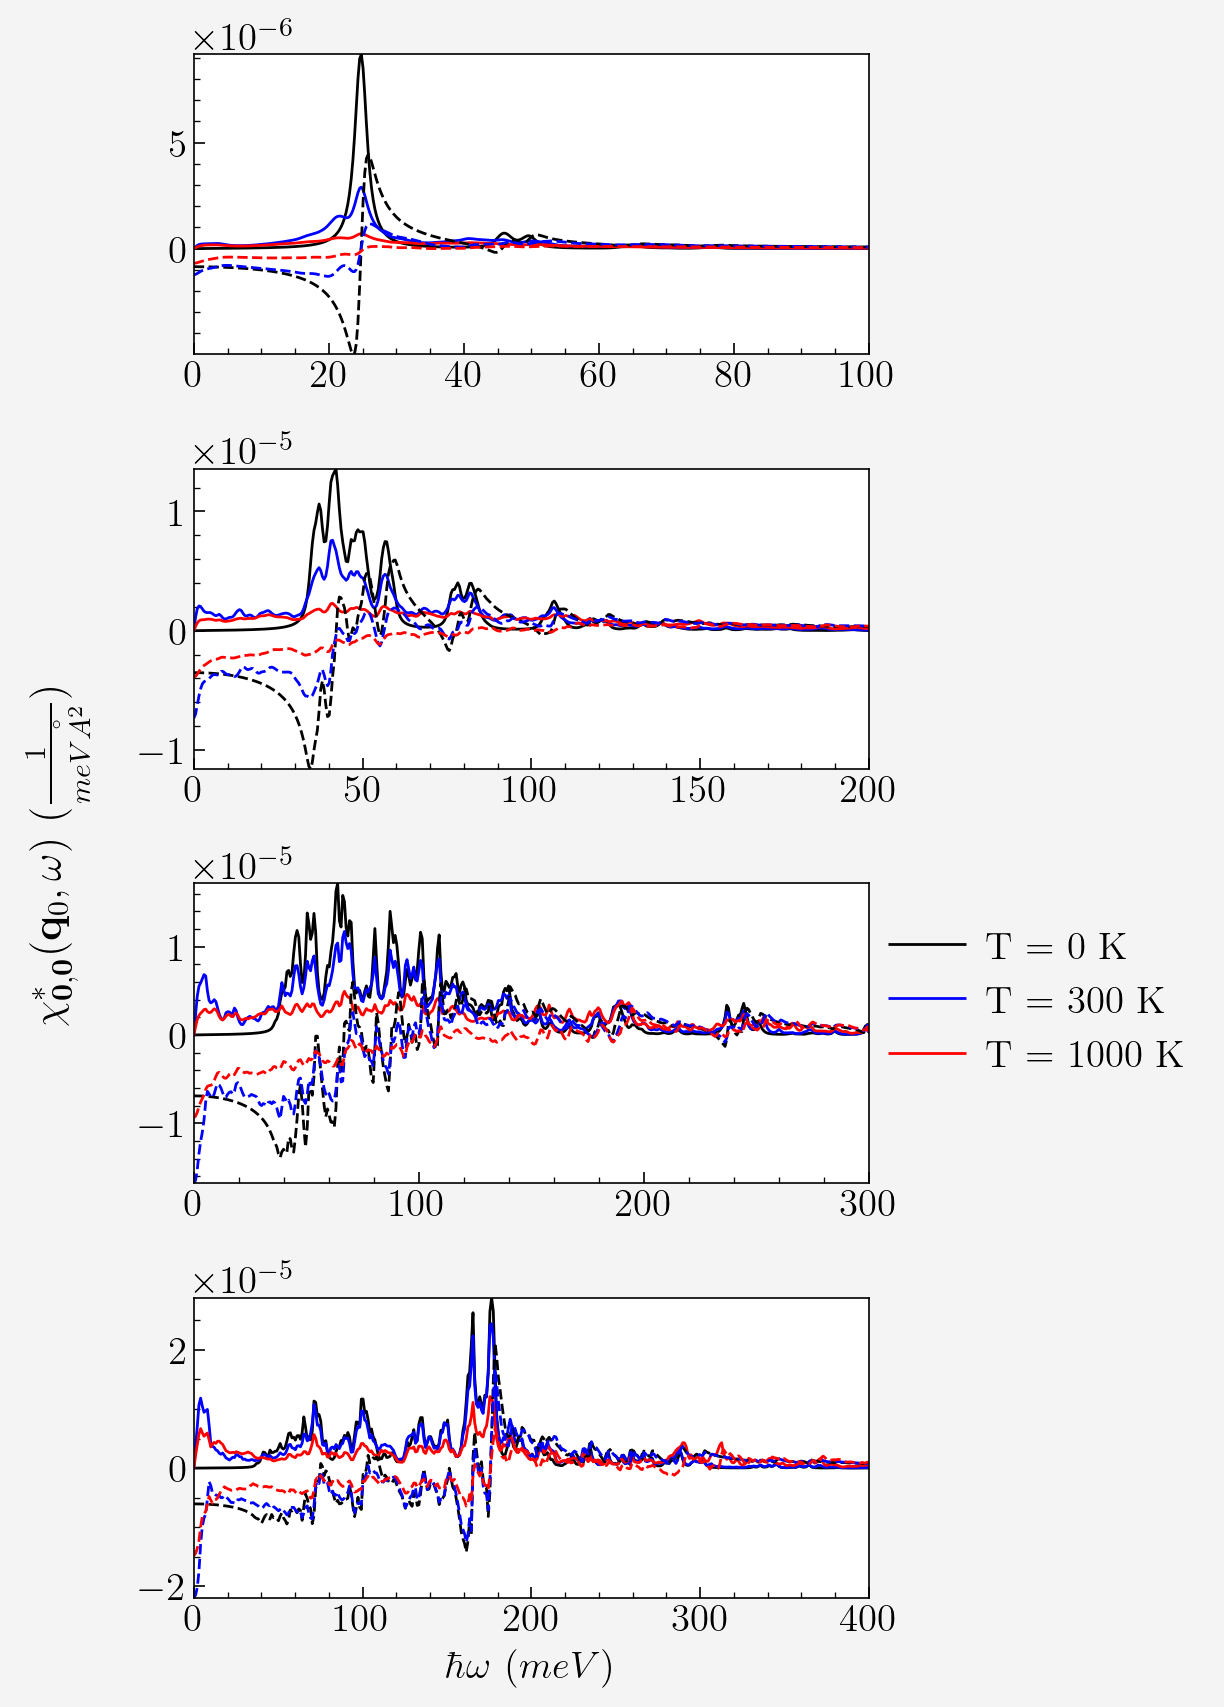

In [249]:
"""
Density-density response functions
"""

array = [
    [1],
    [2],
    [3],
    [4]
]


fig = pplt.figure(share=0, refheight=1.5, refwidth = 3.375)
axs = fig.subplots(array)
axs.format(
    abc='False',
    grid='False',
    tickdir='in'
)

hbarwVals1=np.linspace(0,100,400)
hbarwVals2=np.linspace(0,200,400)
hbarwVals3=np.linspace(0,300,400)
hbarwVals4=np.linspace(0,400,400)

DDRFMatrixElement1 = np.load('DDRFZeroZeroMoS2Apr022022N=7Shells=9Hbareta=1.00Theta=1.0energy0,100,400TVals=0,300,1000ModFactor=1.npy')
DDRFMatrixElement2 = np.load('DDRFZeroZeroMoS2Apr022022N=7Shells=9Hbareta=1.00Theta=2.0energy0,200,400TVals=0,300,1000ModFactor=1.npy')
DDRFMatrixElement3 = np.load('DDRFZeroZeroMoS2Apr032022N=7Shells=9Hbareta=1.00Theta=3.0energy0,299,400TVals=0,300,1000ModFactor=1.npy')
DDRFMatrixElement4 = np.load('DDRFZeroZeroMoS2Apr022022N=11Shells=9Hbareta=1.00Theta=4.0energy0,400,400TVals=0,300,1000ModFactor=1.npy')

#axs[0].plot(hbarwVals, np.real(DDRFMatrixElement1[:,0]), color = "grey", linestyle = 'dashed', label = 'T = 0K', linewidth="1")
axs[0].plot(hbarwVals1, -np.imag(DDRFMatrixElement1[:,0]), label = 'T = 0K', color = "black", linewidth="1")
axs[0].plot(hbarwVals1, -np.imag(DDRFMatrixElement1[:,1]), label = 'T = 300K', color = "blue", linewidth="1")
axs[0].plot(hbarwVals1, -np.imag(DDRFMatrixElement1[:,2]), label = 'T = 1000K', color = "red", linewidth="1")
axs[0].plot(hbarwVals1, np.real(DDRFMatrixElement1[:,0]), color = "black", linewidth="1", linestyle='dashed')
axs[0].plot(hbarwVals1, np.real(DDRFMatrixElement1[:,1]), color = "blue", linewidth="1", linestyle='dashed')
axs[0].plot(hbarwVals1, np.real(DDRFMatrixElement1[:,2]), color = "red", linewidth="1", linestyle='dashed')

axs[0].tick_params(direction = "in")
axs[0].tick_params(which = 'minor', direction = "in")

#axs[1].plot(hbarwVals, np.real(DDRFMatrixElement2[:,0]), color = "grey", linestyle = 'dashed', label = 'T = 0K', linewidth="1")
axs[1].plot(hbarwVals2,-np.imag(DDRFMatrixElement2[:,0]), label = 'T = 0K', color = "black", linewidth="1")
axs[1].plot(hbarwVals2,-np.imag(DDRFMatrixElement2[:,1]), label = 'T = 300K', color = "blue", linewidth="1")
axs[1].plot(hbarwVals2,-np.imag(DDRFMatrixElement2[:,2]), label = 'T = 1000K', color = "red", linewidth="1")
axs[1].plot(hbarwVals2, np.real(DDRFMatrixElement2[:,0]), color = "black", linewidth="1", linestyle='dashed')
axs[1].plot(hbarwVals2, np.real(DDRFMatrixElement2[:,1]), color = "blue", linewidth="1", linestyle='dashed')
axs[1].plot(hbarwVals2, np.real(DDRFMatrixElement2[:,2]), color = "red", linewidth="1", linestyle='dashed')

axs[1].tick_params(direction = "in")
axs[1].tick_params(which = 'minor', direction = "in")

#axs[2].plot(hbarwVals, np.real(DDRFMatrixElement3[:,0]), color = "grey", linestyle = 'dashed', label = 'T = 0K', linewidth="1")
axs[2].plot(hbarwVals3, -np.imag(DDRFMatrixElement3[:,0]), label = 'T = 0 K', color = "black", linewidth="1")
axs[2].plot(hbarwVals3, -np.imag(DDRFMatrixElement3[:,1]), label = 'T = 300 K', color = "blue", linewidth="1")
axs[2].plot(hbarwVals3, -np.imag(DDRFMatrixElement3[:,2]), label = 'T = 1000 K', color = "red", linewidth="1")
axs[2].plot(hbarwVals3, np.real(DDRFMatrixElement3[:,0]), color = "black", linewidth="1", linestyle='dashed')
axs[2].plot(hbarwVals3, np.real(DDRFMatrixElement3[:,1]), color = "blue", linewidth="1", linestyle='dashed')
axs[2].plot(hbarwVals3, np.real(DDRFMatrixElement3[:,2]), color = "red", linewidth="1", linestyle='dashed')

axs[2].tick_params(direction = "in")
axs[2].legend(frameon=False, ncols=1, loc=(1,0.3))
axs[2].tick_params(which = 'minor', direction = "in")

#axs[3].plot(hbarwVals, np.real(DDRFMatrixElement4[:,0]), color = "grey", linestyle = 'dashed', label = 'T = 0K', linewidth="1")
axs[3].plot(hbarwVals4, -np.imag(DDRFMatrixElement4[:,0]), label = 'T = 0K', color = "black", linewidth="1")
axs[3].plot(hbarwVals4, -np.imag(DDRFMatrixElement4[:,1]), label = 'T = 300K', color = "blue", linewidth="1")
axs[3].plot(hbarwVals4, -np.imag(DDRFMatrixElement4[:,2]), label = 'T = 1000K', color = "red", linewidth="1")
axs[3].plot(hbarwVals4, np.real(DDRFMatrixElement4[:,0]), color = "black", linewidth="1", linestyle='dashed')
axs[3].plot(hbarwVals4, np.real(DDRFMatrixElement4[:,1]), color = "blue", linewidth="1", linestyle='dashed')
axs[3].plot(hbarwVals4, np.real(DDRFMatrixElement4[:,2]), color = "red", linewidth="1", linestyle='dashed')

axs[3].tick_params(direction = "in")
axs[3].tick_params(which = 'minor', direction = "in")

plt.xlabel(r'$\hbar\omega$ $(meV)$')

for col in range(4):
    ax = axs[col]
    ax.margins(0)

fig.supylabel(r"$\chi^{*}_{\mathbf{0}, \mathbf{0}}(\mathbf{q}_0, \omega)$ $(\frac{1}{meV\AA^2})$")
#plt.tight_layout(pad=0.1)
plt.margins(0)
#plt.legend(frameon=False)
plt.savefig(figSaveDir+'DDRFMultiplot%s.pdf' % date, bbox_inches='tight')
plt.show()


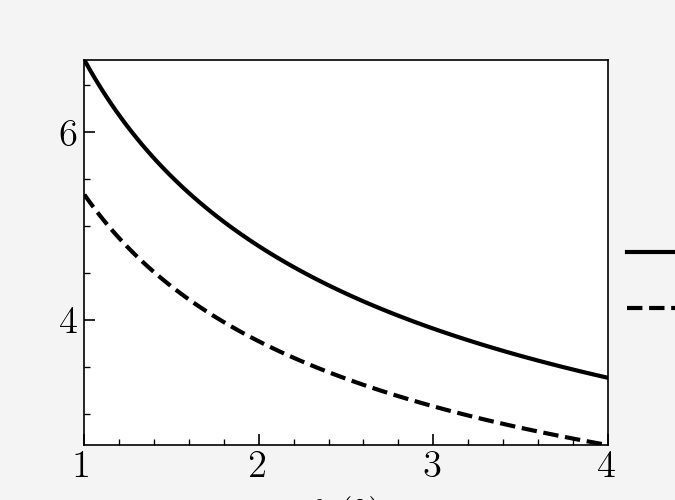

In [109]:
"""
Plot of lambda and (honeycomb nearest-neighbor distance)/(oscillator length) as a function of theta
"""

material = 'MoS2'

modStrengthFactor = 1

if material == 'WS2':
    a0 = 3.18
    mStar = 0.87 * electronMass
    V1 = 33.5* modStrengthFactor
    V2 = 4.0* modStrengthFactor
    V3 = 5.5* modStrengthFactor

if material == 'MoS2':
    a0 = 3.182 # atomic lattice constant in Å
    V1 = 39.45 * modStrengthFactor #meV
    V2 = 6.5 * modStrengthFactor #meV
    V3 = 10.0 * modStrengthFactor #meV
    mStar = 0.9 * electronMass

def computeParameters(theta):
    aM = a0*(180/np.pi)/theta # angstroms
    gamma = 4*np.pi**2*(V1+6*V2+4*V3) # meV
    hbaromega = hbar*np.sqrt(gamma/mStar)/aM # sqrt(meV/electron mass)/angstrom
    l = np.sqrt(hbar**2/(mStar*hbaromega))
    coulombEnergy = eSquaredOvere0/(dielectricConstant*l) # e^2 = 1.44 eV*nm
    ratio = coulombEnergy/hbaromega
    return(aM, gamma, hbaromega, l, coulombEnergy, ratio)

thetaMin = 1
thetaMax = 4
numThetaVals = 100
thetaVals = np.linspace(thetaMin, thetaMax, numThetaVals)
lofTheta = np.zeros_like(thetaVals)
amOfTheta = np.zeros_like(thetaVals)
lambdaOfTheta = np.zeros_like(thetaVals)


for thetaIndex in range(numThetaVals):
    theta = thetaVals[thetaIndex]
    aM, gamma, hbaromega, l, coulombEnergy, ratio = computeParameters(theta)
    lofTheta[thetaIndex] = l
    amOfTheta[thetaIndex] = aM
    lambdaOfTheta[thetaIndex] = ratio
    
plt.plot(thetaVals, amOfTheta/(np.sqrt(3)*lofTheta), label=r'$(a_M/\sqrt{3})/l$', color='black')
plt.plot(thetaVals, lambdaOfTheta, color='black', label=r'$\lambda$', linestyle='dashed')

plt.xlabel(r'$\theta$ ($^{\circ}$)')
plt.margins(0)
#plt.gca().set_aspect('equal', adjustable='box')
plt.tick_params(which='both',direction='in')
plt.legend(frameon=False,loc=(1,0.25))

plt.savefig(r'lambdaandlOveramOfTheta.pdf', bbox_inches='tight')

plt.show()

/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipykernel_61853/829702418.py:8: RuntimeWarning: divide by zero encountered in true_divide
  F = (1/2)*np.exp(-9/TVals)*(np.exp(1/TVals)-1)**8 *(1/TVals)**2
/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipykernel_61853/829702418.py:8: RuntimeWarning: overflow encountered in power
  F = (1/2)*np.exp(-9/TVals)*(np.exp(1/TVals)-1)**8 *(1/TVals)**2
/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipykernel_61853/829702418.py:8: RuntimeWarning: invalid value encountered in multiply
  F = (1/2)*np.exp(-9/TVals)*(np.exp(1/TVals)-1)**8 *(1/TVals)**2


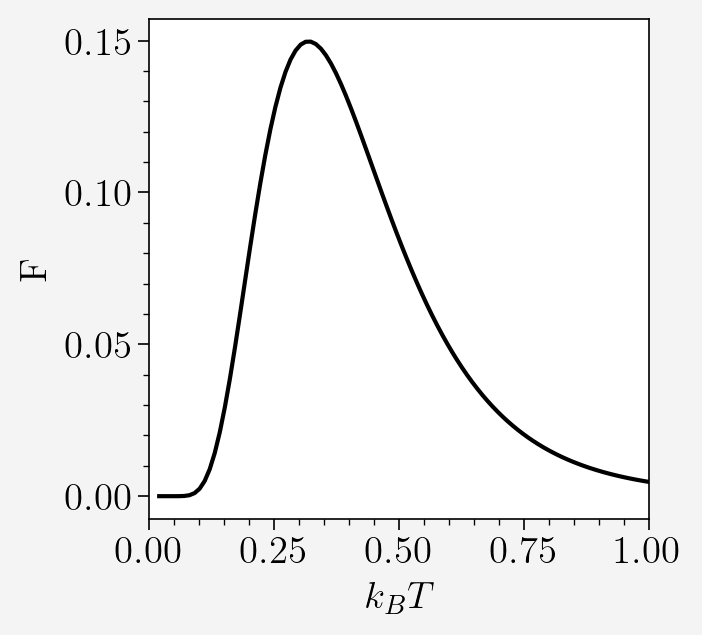

In [250]:
"""
Harmonic oscillator N=0 to 1 detailed balance vs temperature
"""

TMin = 0
TMax = 1
numTVals = 100
TVals = np.linspace(TMin, TMax, numTVals)

F = (1/2)*np.exp(-9/TVals)*(np.exp(1/TVals)-1)**8 *(1/TVals)**2

array = [
    [1],
]

fig = pplt.figure(share=0, refwidth=2.5)#, refaspect = 1.333)
axs = fig.subplots(array)

axs.format(
    abc = False,
    grid= False
)

axs[0].plot(TVals, F, color = 'black')

axs[0].format(xlabel=r'$k_{B}T$', ylabel = r'F')


/var/folders/99/6zg_dfx57r57yvqj57hdjydr0000gn/T/ipykernel_61853/4124418427.py:22: ProplotWarning: Setting rc['figure.constrained_layout.use'] to False. Proplot uses its own tight layout algorithm that is activated by default. To disable it, set pplt.rc['subplots.tight'] to False or pass tight=False to pplt.subplots(). For details, see fig.auto_layout().
  fig = pplt.figure(share=0, refwidth=2.5)#, refaspect = 1.333)


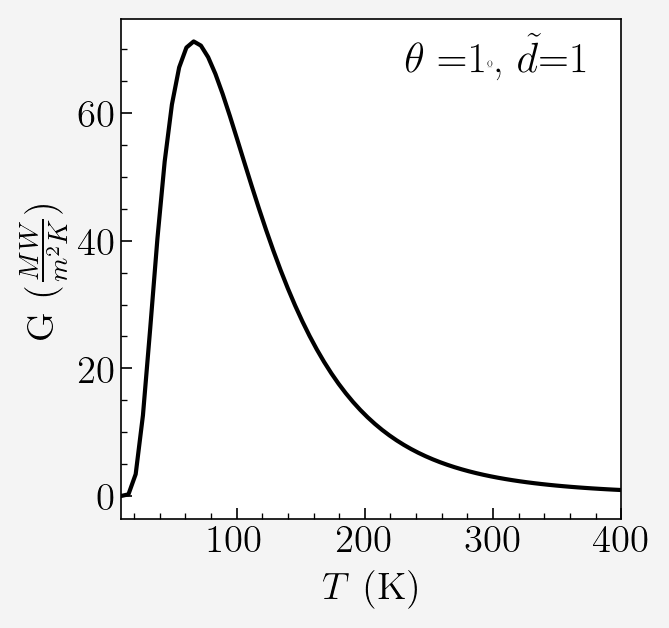

In [23]:
theta = 1
epsForED = 5.1
N=6
numEStatesIncluded = 8
dTilde=1
sTilde = 0

TLineCutMin = 10
TLineCutMax = 400 * theta
numTLineCutVals = 70
TLineCutVals = np.linspace(TLineCutMin,TLineCutMax,numTLineCutVals)
GLineCutInTVals = np.load('GLineCutInTMar122022theta=1EpsilonED=5dTilde=1sTilde=0N=6Included=8.npy')

#GLineCutInTVals = np.load('GLineCutInTMar122022theta=1EpsilonED=5100dTilde=0sTilde=0N=6Included=6.npy')

#GLineCutInTVals = np.load('GLineCutInTMar132022theta=2EpsilonED=5dTilde=1sTilde=0N=6Included=8.npy')

array = [
    [1],
]

fig = pplt.figure(share=0, refwidth=2.5)#, refaspect = 1.333)
axs = fig.subplots(array)

axs.format(
    abc = False,
    grid= False,
    titleloc='ur',
    tickdir='in'
)

axs[0].plot(TLineCutVals, GLineCutInTVals*10**(-6), color = 'black')
axs[0].format(title = r'$\theta=$%dº, $\tilde{d}$=%d' % (theta, dTilde), xlabel = r'$T$ (K)', ylabel = r'G $(\frac{MW}{m^2K})$')#, xscale='log', yscale='log')

plt.savefig('moireAtomGTLineCut%stheta=%dEpsilonED=%ddTilde=%dsTilde=%dTMin=%dTMax=%dnumTVals=%dN=%dIncluded=%d' % (date, theta, epsForED, dTilde,sTilde, TLineCutMin, TLineCutMax, numTLineCutVals, N, numEStatesIncluded))

(2, 2, 1, 100)


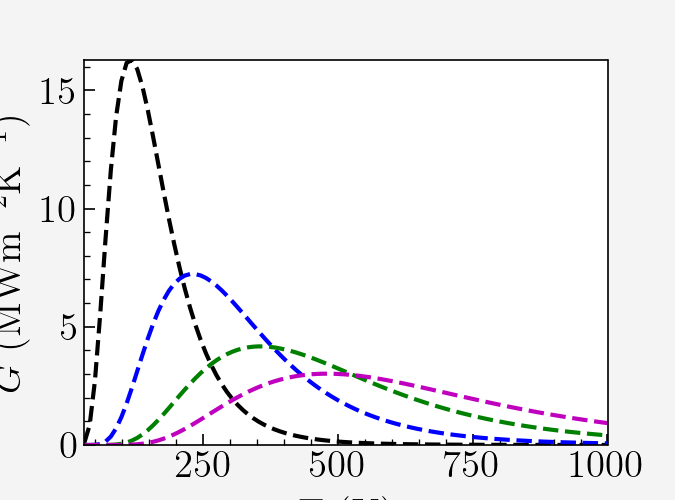

In [214]:
"""
comparison of moiré atoms at several theta
"""
interactionIndex = 1 #0 is interacting, 1 is single particle

dIndex=1

sIndex=0

dVals = np.array([0,20])

sVals=np.array([0])

TVals10 = np.linspace(30,1000,100)
TVals20 = np.linspace(30,1000,100)
TVals30 = np.linspace(30,1000,100)
TVals40 = np.linspace(30,1000,100)

#GLineCutInTValsTheta1Interacting=np.load('GLineCutInTofdandsInteractingandSingleParticleApr032022theta=1EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=10TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex, dIndex, sIndex]
GLineCutInTValsTheta1=np.load('GLineCutInTofdandsInteractingandSingleParticleApr072022theta=1EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=15TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex, dIndex, sIndex]
GLineCutInTValsTheta2=np.load('GLineCutInTofdandsInteractingandSingleParticleApr102022theta=2Mod=1EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=15TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex,dIndex, sIndex]
GLineCutInTValsTheta3=np.load('GLineCutInTofdandsInteractingandSingleParticleApr102022theta=3.02Mod=1EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=15TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex, dIndex, sIndex]
GLineCutInTValsTheta4=np.load('GLineCutInTofdandsInteractingandSingleParticleApr102022theta=4Mod=1EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=15TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex,dIndex, sIndex]

print(np.shape(np.load('GLineCutInTofdandsInteractingandSingleParticleApr032022theta=1EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=10TMin=30TMax=1000numTVals=100Gamma0=1.npy')))
fig, ax = plt.subplots()

if interactionIndex == 0:
    ax.plot(TVals10, GLineCutInTValsTheta1*10**(-6), color = 'black', label=r'$\theta=1^{\circ}$')
    ax.plot(TVals20, GLineCutInTValsTheta2*10**(-6), color = 'blue', label=r'$\theta=2^{\circ}$')
    ax.plot(TVals30, GLineCutInTValsTheta3*10**(-6), color = 'green', label=r'$\theta=3^{\circ}$')
    ax.plot(TVals40, GLineCutInTValsTheta4*10**(-6), color = 'm', label=r'$\theta=4^{\circ}$')
if interactionIndex == 1:
    ax.plot(TVals10, GLineCutInTValsTheta1*10**(-6), color = 'black', linestyle='dashed', label=r'$\theta=1^{\circ}$')
    ax.plot(TVals20, GLineCutInTValsTheta2*10**(-6), color = 'blue', linestyle='dashed', label=r'$\theta=2^{\circ}$')
    ax.plot(TVals30, GLineCutInTValsTheta3*10**(-6), color = 'green', linestyle='dashed', label=r'$\theta=3^{\circ}$')
    ax.plot(TVals40, GLineCutInTValsTheta4*10**(-6), color = 'm', linestyle='dashed', label=r'$\theta=4^{\circ}$')

ax.tick_params(which='both',direction='in')
ax.margins(0)
ax.set(xlabel = r'$T$ (K)', ylabel = r'$G$ (MWm$^{-2}$K$^{-1}$)')#, xscale='log', yscale='log')
#ax.legend(frameon=False, loc=(1,0.25))

#ax.set_title(r'$d=%d$ Å' % dVals[dIndex], y=1.15, x=0.19,pad=-14, color='black')

if interactionIndex == 0:
    interactionLabel = 'Interacting'
if interactionIndex == 1:
    interactionLabel = 'Noninteracting'

plt.savefig('moireAtomGTLineCutED%sComparison%sd=%d.pdf' % (interactionLabel, date, dVals[dIndex]), bbox_inches='tight')

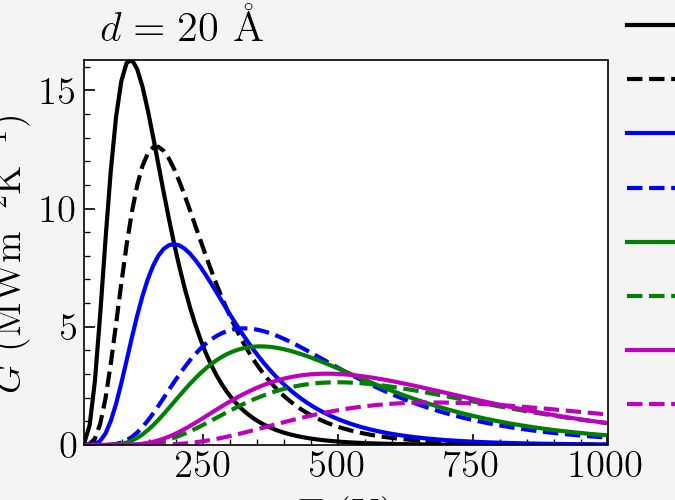

In [264]:
"""
Comparison of several modulation strengths
"""
interactionIndex=1
dIndex=1
sIndex=0

array = [
    [0,1],
]

GLineCutInTValsTheta1Mod1=np.load('GLineCutInTofdandsInteractingandSingleParticleApr072022theta=1EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=15TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex, dIndex, sIndex]
GLineCutInTValsTheta1Mod2=np.load('GLineCutInTofdandsInteractingandSingleParticleApr092022theta=1Mod=2EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=15TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex, dIndex, sIndex]
GLineCutInTValsTheta2Mod1=np.load('GLineCutInTofdandsInteractingandSingleParticleApr032022theta=2EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=10TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex,dIndex, sIndex]
GLineCutInTValsTheta2Mod2=np.load('GLineCutInTofdandsInteractingandSingleParticleApr102022theta=2Mod=2EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=15TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex,dIndex, sIndex]
GLineCutInTValsTheta3Mod1=np.load('GLineCutInTofdandsInteractingandSingleParticleApr102022theta=3.02Mod=1EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=15TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex, dIndex, sIndex]
GLineCutInTValsTheta3Mod2=np.load('GLineCutInTofdandsInteractingandSingleParticleApr112022theta=3Mod=2EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=15TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex, dIndex, sIndex]
GLineCutInTValsTheta4Mod1=np.load('GLineCutInTofdandsInteractingandSingleParticleApr102022theta=4Mod=1EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=15TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex,dIndex, sIndex]
GLineCutInTValsTheta4Mod2=np.load('GLineCutInTofdandsInteractingandSingleParticleApr112022theta=4Mod=2EpsilonED=5dMin=0dMax=20numdVals=2sMin=0sMax=0numsVals=1N=7Included=15TMin=30TMax=1000numTVals=100Gamma0=1.npy')[interactionIndex, dIndex, sIndex]


TVals = np.linspace(30,1000,100)

fig, ax = plt.subplots()

axs.format(
    abc = False,
    grid= False,
    titleloc='ur',
    tickdir='in'
)

ax.plot(TVals, GLineCutInTValsTheta1Mod1*10**(-6), color = 'black', linestyle='solid',label=r'$\theta=1^{\circ}$, $M=1$')
ax.plot(TVals, GLineCutInTValsTheta1Mod2*10**(-6), color = 'black', linestyle='dashed',label=r'$\theta=1^{\circ}$, $M=2$')
ax.plot(TVals, GLineCutInTValsTheta2Mod1*10**(-6), color = 'blue', linestyle='solid',label=r'$\theta=2^{\circ}$, $M=1$')
ax.plot(TVals, GLineCutInTValsTheta2Mod2*10**(-6), color = 'blue', linestyle='dashed',label=r'$\theta=2^{\circ}$, $M=2$')
ax.plot(TVals, GLineCutInTValsTheta3Mod1*10**(-6), color = 'green', linestyle='solid',label=r'$\theta=3^{\circ}$, $M=1$')
ax.plot(TVals, GLineCutInTValsTheta3Mod2*10**(-6), color = 'green', linestyle='dashed',label=r'$\theta=3^{\circ}$, $M=2$')
ax.plot(TVals, GLineCutInTValsTheta4Mod1*10**(-6), color = 'm', linestyle='solid',label=r'$\theta=4^{\circ}$, $M=1$')
ax.plot(TVals, GLineCutInTValsTheta4Mod2*10**(-6), color = 'm', linestyle='dashed',label=r'$\theta=4^{\circ}$, $M=2$')


ax.tick_params(which='both',direction='in')
ax.margins(0)
ax.set(xlabel = r'$T$ (K)', ylabel = r'$G$ (MWm$^{-2}$K$^{-1}$)')#, xscale='log', yscale='log')
ax.legend(loc=(1,0), frameon=False)

ax.set_title(r'$d=%d$ Å' % dVals[dIndex], y=1.15, x=0.19,pad=-14, color='black')

if interactionIndex == 0:
    interactionLabel = 'Interacting'
if interactionIndex == 1:
    interactionLabel = 'Noninteracting'
    
d= dVals[dIndex]

plt.savefig('moireAtomGTLineCutModComparison%sd=%d%s.pdf' % (interactionLabel, d, date), bbox_inches='tight')

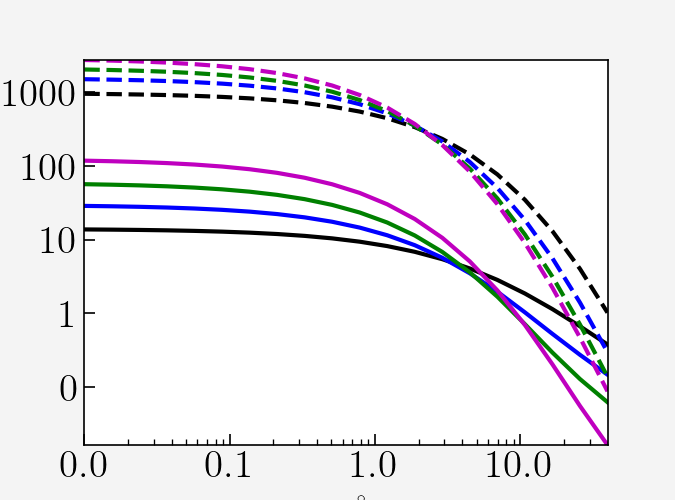

In [242]:
#moire atom model d-dependence

interactionIndex = 0 #0 is interacting, 1 is single particle

dLineCutMin = np.log10(0.01)
dLineCutMax = np.log10(40)
numdLineCutVals = 20

dLineCutVals = np.logspace(dLineCutMin,1.6,numdLineCutVals)

fig, ax = plt.subplots()


#all wrong because of hbar omega typo, need to runa gain
GLineCutIndTheta1Int=np.load('GLineCutIndInteractingandSingleParticleLogLogApr102022theta=1Mod=1EpsilonED=5TMaxInt=118TMaxNonInt=108dMin=-1dMax=1numdVal=20N=7Included=15.npy')[0]
GLineCutIndTheta1SingleParticle=np.load('GLineCutIndInteractingandSingleParticleLogLogApr102022theta=1Mod=1EpsilonED=5TMaxInt=118TMaxNonInt=108dMin=-1dMax=1numdVal=20N=7Included=15.npy')[1]
GLineCutIndTheta2Int=np.load('GLineCutIndInteractingandSingleParticleLogLogApr102022theta=2Mod=1EpsilonED=5TMaxInt=216TMaxNonInt=225dMin=-1dMax=1numdVal=20N=7Included=15.npy')[0]
GLineCutIndTheta2SingleParticle=np.load('GLineCutIndInteractingandSingleParticleLogLogApr102022theta=2Mod=1EpsilonED=5TMaxInt=216TMaxNonInt=225dMin=-1dMax=1numdVal=20N=7Included=15.npy')[1]
GLineCutIndTheta3Int=np.load('GLineCutIndInteractingandSingleParticleLogLogApr102022theta=3.02Mod=1EpsilonED=5TMaxInt=323TMaxNonInt=343dMin=-1dMax=1numdVal=20N=7Included=15.npy')[0]
GLineCutIndTheta3SingleParticle=np.load('GLineCutIndInteractingandSingleParticleLogLogApr102022theta=3.02Mod=1EpsilonED=5TMaxInt=323TMaxNonInt=343dMin=-1dMax=1numdVal=20N=7Included=15.npy')[1]
GLineCutIndTheta4Int=np.load('GLineCutIndInteractingandSingleParticleLogLogApr102022theta=4Mod=1EpsilonED=5TMaxInt=441TMaxNonInt=451dMin=-1dMax=1numdVal=20N=7Included=15.npy')[0]
GLineCutIndTheta4SingleParticle=np.load('GLineCutIndInteractingandSingleParticleLogLogApr102022theta=4Mod=1EpsilonED=5TMaxInt=441TMaxNonInt=451dMin=-1dMax=1numdVal=20N=7Included=15.npy')[1]


""" OLD
GLineCutIndTheta1Int=np.load('GLineCutIndInteractingandSingleParticleLogLogApr032022theta=1EpsilonED=5dMin=-1dMax=1numdVal=20N=7Included=10.npy')[0]
GLineCutIndTheta1SingleParticle=np.load('GLineCutIndInteractingandSingleParticleLogLogApr032022theta=1EpsilonED=5dMin=-1dMax=1numdVal=20N=7Included=10.npy')[1]
"""

ax.plot(dLineCutVals, GLineCutIndTheta1SingleParticle*10**(-6), linestyle='dashed', color ='black')
ax.plot(dLineCutVals, GLineCutIndTheta1Int*10**(-6), label = r'$\theta = 1^{\circ}$', color ='black')
ax.plot(dLineCutVals, GLineCutIndTheta2SingleParticle*10**(-6), linestyle='dashed', color='blue')
ax.plot(dLineCutVals, GLineCutIndTheta2Int*10**(-6), label = r'$\theta = 2^{\circ}$', color='blue')
ax.plot(dLineCutVals, GLineCutIndTheta3SingleParticle*10**(-6), linestyle='dashed', color ='green')
ax.plot(dLineCutVals, GLineCutIndTheta3Int*10**(-6), label = r'$\theta = 3^{\circ}$', color ='green')
ax.plot(dLineCutVals, GLineCutIndTheta4SingleParticle*10**(-6), linestyle='dashed', color ='m')
ax.plot(dLineCutVals, GLineCutIndTheta4Int*10**(-6), label = r'$\theta = 4^{\circ}$', color ='m')


ax.set(xlabel = r'$d$ (Å)', ylabel = r'$G$ (MWm$^{-2}$K$^{-1}$)', yscale='log', xscale='log')#, xscale='log', yscale='log')
#ax.legend(frameon=False, loc=(1,0.25))
plt.yticks(np.array([0.001,0.01,0.1,1,10,100,1000,10000]))
ax.margins(0)
ax.tick_params(which='both',direction='in')
plt.savefig('GLineCutIndSeveralThetaMoireAtomModel%s' % date, bbox_inches='tight')



[1.79910437e+08 1.73959558e+08 1.62966553e+08 1.43691719e+08
 1.13138283e+08 7.27200114e+07 3.41483163e+07 1.14224231e+07
 2.85641743e+06 6.16559069e+05]


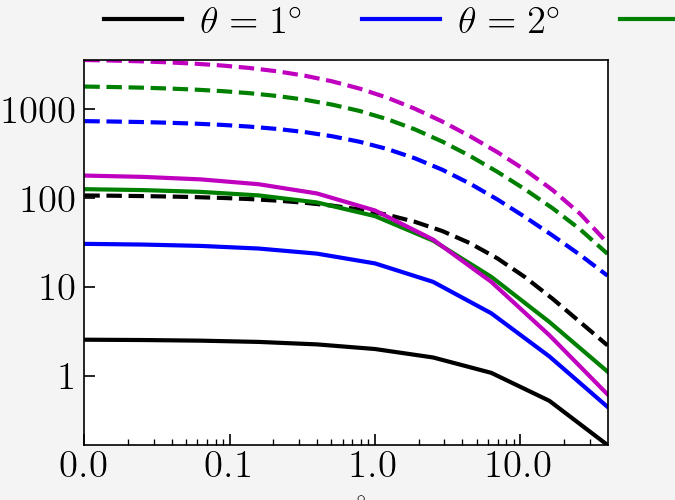

In [248]:
#electron liquid model d-dependence

dLineCutMin = np.log10(0.01)
dLineCutMax = np.log10(40)
numdLineCutVals = 20

dLineCutVals = np.logspace(dLineCutMin,1.6,numdLineCutVals)

dLineCutValsScreened = np.logspace(dLineCutMin,1.6,10)

fig, ax = plt.subplots()

GLineCutIndTheta1=np.load('GLineCutIndLocalLogUNSCREENEDMoS2Apr032022N=7Shells=4Hbareta=1.00Theta=1.0energy0,300,500TVals=110,120ModFactor=1dVals=-1,1,20.npy')
GLineCutindTheta1Screened=np.load('GLineCutIndLocalLogTrueScreenedMoS2Apr052022N=7Shells=4Hbareta=1.00Theta=1.0energy0,200,500TVals=190,200ModFactor=1dVals=-1,1,10.npy')
GLineCutIndTheta2=np.load('GLineCutIndLocalLogUNSCREENEDMoS2Apr032022N=7Shells=4Hbareta=1.00Theta=2.0energy0,400,500TVals=210,220ModFactor=1dVals=-1,1,20.npy')
GLineCutIndTheta2Screened=np.load('GLineCutIndLocalLogTrueScreenedMoS2Apr052022N=7Shells=4Hbareta=1.00Theta=2.0energy0,400,500TVals=400,410ModFactor=1dVals=-1,1,10.npy')
GLineCutIndTheta3=np.load('GLineCutIndLocalLogUNSCREENEDMoS2Apr032022N=7Shells=4Hbareta=1.00Theta=3.0energy0,800,500TVals=360,370ModFactor=1dVals=-1,1,20.npy')
GLineCutIndTheta3Screened=np.load('GLineCutIndLocalLogTrueScreenedMoS2Apr052022N=7Shells=4Hbareta=1.00Theta=3.0energy0,599,500TVals=970,990ModFactor=1dVals=-1,1,10.npy')
GLineCutIndTheta4=np.load('GLineCutIndLocalLogUNSCREENEDMoS2Apr042022N=7Shells=4Hbareta=1.00Theta=4.0energy0,800,500TVals=600,610ModFactor=1dVals=-1,1,20.npy')
GLineCutIndTheta4Screened=np.load('GLineCutIndLocalLogTrueScreenedMoS2Apr052022N=7Shells=4Hbareta=1.00Theta=4.0energy0,800,500TVals=970,990ModFactor=1dVals=-1,1,10.npy')

print(GLineCutIndTheta4Screened)

ax.plot(dLineCutValsScreened, GLineCutindTheta1Screened*10**(-6), label = r'$\theta = 1^{\circ}$', color ='black')
ax.plot(dLineCutVals, GLineCutIndTheta1*10**(-6), linestyle='dashed', color ='black')
ax.plot(dLineCutVals, GLineCutIndTheta2*10**(-6), linestyle='dashed', color='blue')
ax.plot(dLineCutValsScreened, GLineCutIndTheta2Screened*10**(-6), label = r'$\theta = 2^{\circ}$', color='blue')
ax.plot(dLineCutVals, GLineCutIndTheta3*10**(-6),linestyle='dashed', color ='green')
ax.plot(dLineCutValsScreened, GLineCutIndTheta3Screened*10**(-6), label = r'$\theta = 3^{\circ}$', color ='green')
ax.plot(dLineCutVals, GLineCutIndTheta4*10**(-6), linestyle='dashed', color ='m')
ax.plot(dLineCutValsScreened, GLineCutIndTheta4Screened*10**(-6), label = r'$\theta = 4^{\circ}$', color ='m')


ax.set(xlabel = r'$d$ (Å)', ylabel = r'$G$ (MWm$^{-2}$K$^{-1}$)', yscale='log', xscale='log')#, xscale='log', yscale='log')
ax.legend(frameon=False, loc=(0,1), ncol=4)
plt.yticks(np.array([0.01,1,10,100,1000,10000]))
ax.margins(0)
ax.tick_params(which='both',direction='in')
plt.savefig('GLineCutIndSeveralThetaElectronLiquid%s' % date, bbox_inches='tight')

No handles with labels found to put in legend.


(2, 3)
[[2.12899506e-02 5.49146083e-03 1.74025642e-03]
 [1.64879212e+01 6.74192260e-05 2.75428749e-03]]


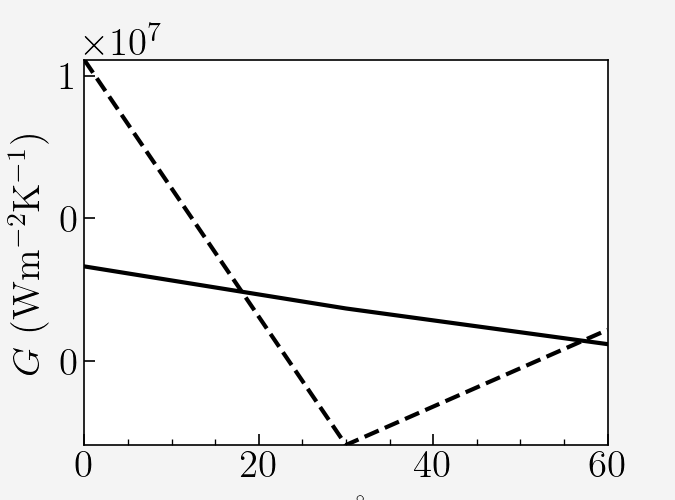

In [278]:
#moire atom model s dependence

sLineCutMin = 0
sLineCutMax = 60
numsLineCutVals = 3

sLineCutVals = np.linspace(sLineCutMin,sLineCutMax,numsLineCutVals)

fig, ax = plt.subplots()

GLineCutInsTheta1=np.load('GValsNoninteractingandSingleParticleofsApr182022theta=1EpsilonED=5TMaxInt=88TMaxNonInt=108sMin=0sMax=60numsVal=3d=20N=7Included=3.npy')
print(np.shape(GLineCutInsTheta1))
print(GLineCutInsTheta1*10**(-6))


ax.plot(sLineCutVals, GLineCutInsTheta1[0], color ='black')
ax.plot(sLineCutVals, GLineCutInsTheta1[1], linestyle='dashed', color ='black')

ax.set(xlabel = r'$s$ (Å)', ylabel = r'$G$ (Wm$^{-2}$K$^{-1}$)', yscale='log')
ax.legend(frameon=False, loc=(0,1), ncol=4)
ax.margins(0)
ax.tick_params(which='both',direction='in')

#plt.savefig('moireAtomModelsLineCutTheta1%s' % date, bbox_inches='tight')

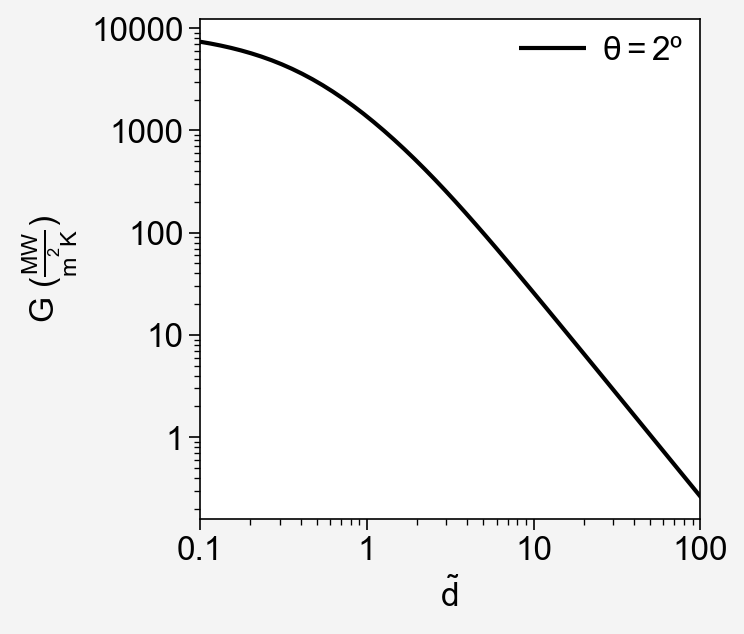

In [52]:
theta=2

dLineCutMin = -1
dLineCutMax = 2
numdLineCutVals = 50

dLineCutVals = np.logspace(dLineCutMin,dLineCutMax,numdLineCutVals)

array = [
    [1],
]


fig = pplt.figure(share=0, refwidth=2.5)#, refaspect = 1.333)
axs = fig.subplots(array)

axs.format(
    abc = False,
    grid= False,
    titleloc='ur',
)

#GLineCutIndTheta1=np.load('GLineCutIndLocalLogUNSCREENEDMoS2Mar132022N=7Shells=4Hbareta=0.10Theta=1.0energy0,300,500TVals=100,110ModFactor=1dVals=0,1,20.npy')
GLineCutIndTheta2=np.load('GLineCutIndLogMar132022theta=2EpsilonED=5100dMin=-1dMax=2numdVal=50N=6Included=8.npy')
#GLineCutIndTheta3=np.load('GLineCutIndLocalLogUNSCREENEDMoS2Mar132022N=7Shells=4Hbareta=1.00Theta=3.0energy0,700,500TVals=360,370ModFactor=1dVals=0,1,20.npy')
#GLineCutIndTheta4=np.load('GLineCutIndLocalLogUNSCREENEDMoS2Mar102022N=7Shells=4Hbareta=1.00Theta=4.0energy0,800,500TVals=490,500ModFactor=1dVals=0,1,20.npy')
#axs[0].plot(dLineCutVals, GLineCutIndTheta1*10**(-6), label = r'$\theta = 1º$')
axs[0].plot(dLineCutVals, GLineCutIndTheta2*10**(-6),color='black', label = r'$\theta = 2º$')
#axs[0].plot(dLineCutVals, GLineCutIndTheta3*10**(-6), label = r'$\theta = 3º$')
#axs[0].plot(dLineCutVals, GLineCutIndTheta4*10**(-6), label = r'$\theta = 4º$')

axs[0].format(xlabel = r'$\tilde{d}$', ylabel = r'G $(\frac{MW}{m^2K})$', xscale='log', yscale='log')
axs[0].legend(loc='ur', ncols=1, frame=False)

plt.savefig('GLineCutIndLogMoreAtomModelNoninteractingTheta=%d%s' % (theta, date), bbox_inches='tight')



Can I make a color plot of G as a function of theta and T?
Screened vs unscreened

In [170]:
omg = 24.68

L = np.sqrt(hbar**2/(omg*mStar))
E0 = eSquaredOvere0/(dielectricConstant*L)

xTildeMin = 0
xTildeMax = 3
numxTildeVals = 50

xTildeVals = np.linspace(xTildeMin, xTildeMax, numxTildeVals)

xTildeMinLog = np.log10(0.1)
xTildeMaxLog = np.log10(100)

xTildeValsLog = np.logspace(xTildeMinLog, xTildeMaxLog, numxTildeVals)

VTwoHole01ofsTilde = np.zeros(numxTildeVals)
VTwoHole01ofdTilde = np.zeros(numxTildeVals)
VTwoHole01ofdTildeLog = np.zeros(numxTildeVals)

VTwoHoleFlipsofsTilde = np.zeros(numxTildeVals)

for xTildeIndex in range(numxTildeVals):
    xTilde = xTildeVals[xTildeIndex]
    xTildeLog = xTildeValsLog[xTildeIndex]
    VTwoHole01s = ed.Coul_hh_generalSeparation(0, xTilde,omg,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0)/E0
    VTwoHole01d = ed.Coul_hh_generalSeparation(xTilde, 0,omg,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0)/E0
    VTwoHole01dLog = ed.Coul_hh_generalSeparation(xTildeLog, 0,omg,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0)/E0
    VTwoHoleFlips = ed.Coul_hh_generalSeparation(0, xTilde,omg,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0)/E0
    VTwoHole01ofsTilde[xTildeIndex] = VTwoHole01s
    VTwoHole01ofdTilde[xTildeIndex] = VTwoHole01d
    VTwoHoleFlipsofsTilde[xTildeIndex] = VTwoHoleFlips
    VTwoHole01ofdTildeLog[xTildeIndex] = VTwoHole01dLog

fig, ax  = plt.subplots()

#ax.plot(xTildeVals, VTwoHole01ofdTilde, color = 'black', label = r'$\tilde{V}_{(\pm 1, 0)}(x = \tilde{d})$')
ax.plot(xTildeVals, VTwoHole01ofsTilde, color = 'black', linestyle = 'dashed', label = r'$\tilde{V}_{(\pm 1, 0)}(x = \tilde{s})$')
ax.plot(xTildeVals, VTwoHoleFlipsofsTilde, color = 'black', linestyle = 'dotted', label = r'$\tilde{V}_{(\pm 1 \rightarrow \mp 1, 0)}(x = \tilde{s})$')

ax.set(xlabel = r'$\tilde{s}$')#, xscale='log', yscale='log')

ax.legend(loc=(1,0.25), frameon=False)
ax.margins(0)
ax.tick_params(which='both',direction='in')

plt.savefig('InteratomCMEs%s.pdf' % date, bbox_inches='tight')

fig, ax  = plt.subplots()

ax.plot(xTildeVals, VTwoHole01ofdTilde, color = 'black')
#ax.plot(xTildeVals, VTwoHole01ofsTilde**2, color = 'black', linestyle = 'dashed', label = r'$|\tilde{V}_{(\pm 1, 0)}(\tilde{d})|^2$')
#ax.plot(xTildeVals, VTwoHoleFlipsofsTilde**2, color = 'black', linestyle = 'dotted', label = r'$|\tilde{V}_{(\pm 1 \rightarrow \mp 1, 0)}(x = \tilde{s})|^2$')

ax.set(xlabel = r'$\tilde{d}$', ylabel = r'$|\tilde{V}_{(\pm 1, 0)}(\tilde{d})|^2$')#, xscale='log', yscale='log')

#ax.legend(loc=(1,0.25), frameon=False)
ax.margins(0)
ax.tick_params(which='both',direction='in')

plt.savefig('InteratomCMEsSquareddOnly%s.pdf' % date, bbox_inches='tight')

fig, ax  = plt.subplots()

ax.plot(xTildeValsLog, VTwoHole01ofdTildeLog[numxTildeVals-1]**2/(xTildeValsLog/xTildeValsLog[numxTildeVals-1])**6, label = r'$\alpha \tilde{d}^{-6}$', linestyle='dashed', color = 'black')
ax.plot(xTildeValsLog, VTwoHole01ofdTildeLog**2, color = 'black')
ax.set(xscale='log', yscale='log')
#matplotlib.pyplot.ticklabel_format(axis='both', style='sci')
ax.legend(frameon=False)


ax.margins(0)
ax.tick_params(which='both',direction='in')

plt.savefig('InteratomCMEsSquaredLogLog%s.pdf' % date, bbox_inches='tight')

KeyboardInterrupt: 

3193.8039841925165
dTilde: 1.5876540924412643
sVals: [ 0.          1.24023925  2.48047851  3.72071776  4.96095702  6.20119627
  7.44143553  8.68167478  9.92191404 11.16215329 12.40239254 13.6426318
 14.88287105 16.12311031 17.36334956 18.60358882 19.84382807 21.08406733
 22.32430658 23.56454584 24.80478509 26.04502434 27.2852636  28.52550285
 29.76574211 31.00598136 32.24622062 33.48645987 34.72669913 35.96693838
 37.20717763 38.44741689 39.68765614 40.9278954  42.16813465 43.40837391
 44.64861316 45.88885242 47.12909167 48.36933093 49.60957018 50.84980943
 52.09004869 53.33028794 54.5705272  55.81076645 57.05100571 58.29124496
 59.53148422 60.77172347]


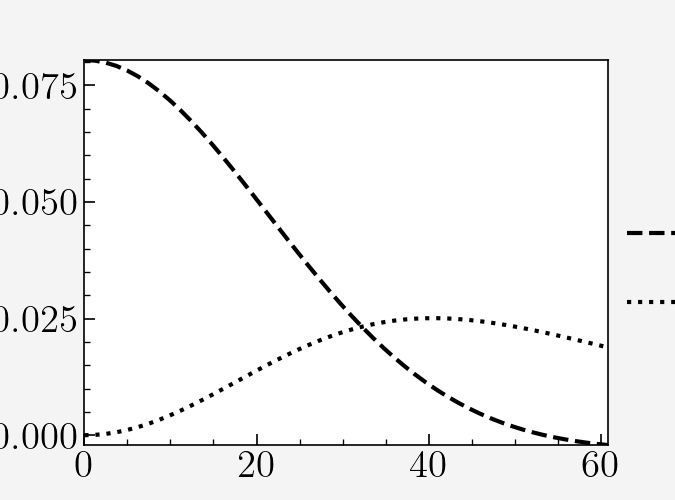

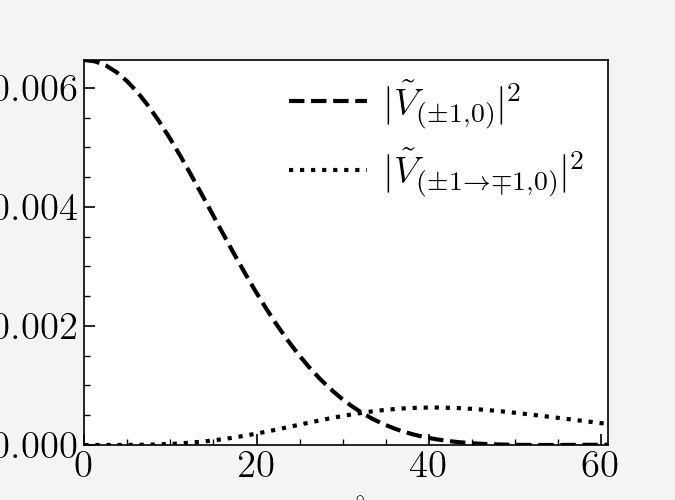

In [224]:
#dependence of CME's on s at finite d

theta = 1

aM, gamma, hbaromega, l, coulombEnergy, interAtomCoulomb, coulombRatio, coulombToConfinementRatio = computeParameters(theta)

E0 = eSquaredOvere0/(dielectricConstant*L)

sTildeMin = 0
sTildeMax = aM/(3*l)
numsTildeVals = 50

d = 20

dTilde = d/l * epsilonEffD

print('dTilde:',dTilde)

sVals = np.linspace(0, aM/3, numsTildeVals)

print('sVals:', sVals)

sTildeVals = np.linspace(sTildeMin, sTildeMax, numsTildeVals)

VTwoHole01ofsTilde = np.zeros(numxTildeVals)
VTwoHole01ofdTilde = np.zeros(numxTildeVals)
VTwoHoleFlipsofsTilde = np.zeros(numxTildeVals)

for sTildeIndex in range(numsTildeVals):
    sTilde = sTildeVals[sTildeIndex]
    VTwoHole01s = ed.Coul_hh_generalSeparation(dTilde, sTilde,omg,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0)/E0
    #VTwoHole01d = ed.Coul_hh_generalSeparation(xTilde, 0,omg,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0)/E0
    VTwoHoleFlips = ed.Coul_hh_generalSeparation(dTilde, sTilde,omg,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0)/E0
    VTwoHole01ofsTilde[sTildeIndex] = VTwoHole01s
    VTwoHole01ofdTilde[sTildeIndex] = VTwoHole01d
    VTwoHoleFlipsofsTilde[sTildeIndex] = VTwoHoleFlips

fig, ax  = plt.subplots()

#ax.plot(sVals, VTwoHole01ofdTilde, color = 'black', label = r'$\tilde{V}_{(\pm 1, 0)}(x = \tilde{d})$')
ax.plot(sVals, VTwoHole01ofsTilde, color = 'black', linestyle = 'dashed', label = r'$\tilde{V}_{(\pm 1, 0)}(x = \tilde{s})$')
ax.plot(sVals, VTwoHoleFlipsofsTilde, color = 'black', linestyle = 'dotted', label = r'$\tilde{V}_{(\pm 1 \rightarrow \mp 1, 0)}(x = \tilde{s})$')

ax.set(xlabel = r'$x$', ylabel = r'$E$ $(E_0)$')#, xscale='log', yscale='log')

ax.legend(loc=(1,0.25), frameon=False)
ax.margins(0)
ax.tick_params(which='both',direction='in')

plt.savefig('InteratomCMEs%s.pdf' % date, bbox_inches='tight')

fig, ax  = plt.subplots()

#ax.plot(xTildeVals, VTwoHole01ofdTilde**2, color = 'black', label = r'$|\tilde{V}_{(\pm 1, 0)}(\tilde{d})|^2$')
ax.plot(sVals, VTwoHole01ofsTilde**2, color = 'black', linestyle = 'dashed', label = r'$|\tilde{V}_{(\pm 1, 0)}|^2$')
ax.plot(sVals, VTwoHoleFlipsofsTilde**2, color = 'black', linestyle = 'dotted', label = r'$|\tilde{V}_{(\pm 1 \rightarrow \mp 1, 0)}|^2$')

ax.set(xlabel = r'$s$ (Å)')#, xscale='log', yscale='log')

ax.legend(frameon=False)
ax.margins(0)
ax.tick_params(which='both',direction='in')

plt.savefig('InteratomCMEsSquaredTheta=%dAsAFunctionOfsd=%ddate=%s.pdf' % (theta, d, date), bbox_inches='tight')


dTilde: 1.0999061484349248


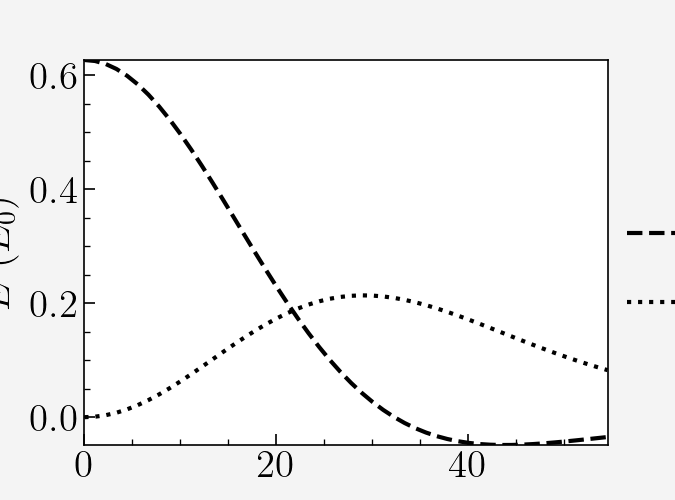

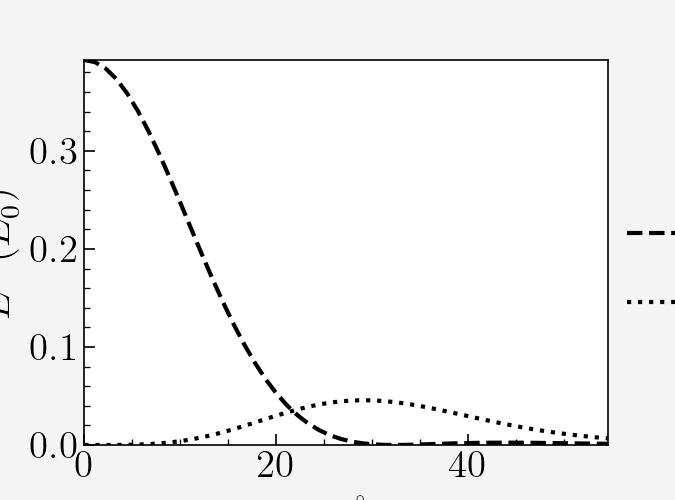

In [166]:

#for 2nm displacement, dependence on s

omg = 28

L = np.sqrt(hbar**2/(omg*mStar))
E0 = eSquaredOvere0/(dielectricConstant*L)

dTilde = 20/L

print('dTilde:', dTilde)

sTildeMin = 0
sTildeMax = 0
numxTildeVals = 50

sTildeVals = np.linspace(xTildeMin, xTildeMax, numxTildeVals)

VTwoHole01ofsTilde = np.zeros(numxTildeVals)
VTwoHoleFlipsofsTilde = np.zeros(numxTildeVals)

for xTildeIndex in range(numxTildeVals):
    xTilde = xTildeVals[xTildeIndex]
    VTwoHole01s = ed.Coul_hh_generalSeparation(d, xTilde,omg,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0)/E0
    VTwoHoleFlips = ed.Coul_hh_generalSeparation(dTilde, xTilde,omg,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0)/E0
    VTwoHole01ofsTilde[xTildeIndex] = VTwoHole01s
    VTwoHoleFlipsofsTilde[xTildeIndex] = VTwoHoleFlips

fig, ax  = plt.subplots()

ax.plot(xTildeVals*L, VTwoHole01ofsTilde, color = 'black', linestyle = 'dashed', label = r'$\tilde{V}_{(\pm 1, 0)}(x = \tilde{s})$')
ax.plot(xTildeVals*L, VTwoHoleFlipsofsTilde, color = 'black', linestyle = 'dotted', label = r'$\tilde{V}_{(\pm 1 \rightarrow \mp 1, 0)}(x = \tilde{s})$')

ax.set(xlabel = r'$x$', ylabel = r'$E$ $(E_0)$')#, xscale='log', yscale='log')

ax.legend(loc=(1,0.25), frameon=False)

ax.margins(0)
ax.tick_params(which='both',direction='in')

plt.savefig('InteratomCMEsAt2nmdAsAFunctionOfs%s.pdf' % date, bbox_inches='tight')

fig, ax  = plt.subplots()

ax.plot(xTildeVals*L, VTwoHole01ofsTilde**2, color = 'black', linestyle = 'dashed', label = r'$|\tilde{V}_{(\pm 1, 0)}|^2$')
ax.plot(xTildeVals*L, VTwoHoleFlipsofsTilde**2, color = 'black', linestyle = 'dotted', label = r'$|\tilde{V}_{(\pm 1 \rightarrow \mp , 0)}|^2$')

ax.set(xlabel = r'$s$ $(Å)$', ylabel = r'$E^2$ $(E_0^2)$')#, xscale='log', yscale='log')

ax.legend(loc=(1,0.25), frameon=False)

ax.margins(0)
ax.tick_params(which='both',direction='in')

plt.savefig('InteratomCMEsSquaredAt2nmdAsAFunctionOf%s.pdf' % date, bbox_inches='tight')


In [56]:
VTwoHole01dZero = ed.Coul_hh_generalSeparation(0, 0,omg,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0)/E0
VTwoHole01d20A = ed.Coul_hh_generalSeparation(1.74, 0,omg,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0)/E0
print('ratio:', (VTwoHole01d20A/VTwoHole01dZero)**2)

#Ratio is just about a tenth, so ratio of the square is just about a hundredth

ratio: 0.0120571745808493


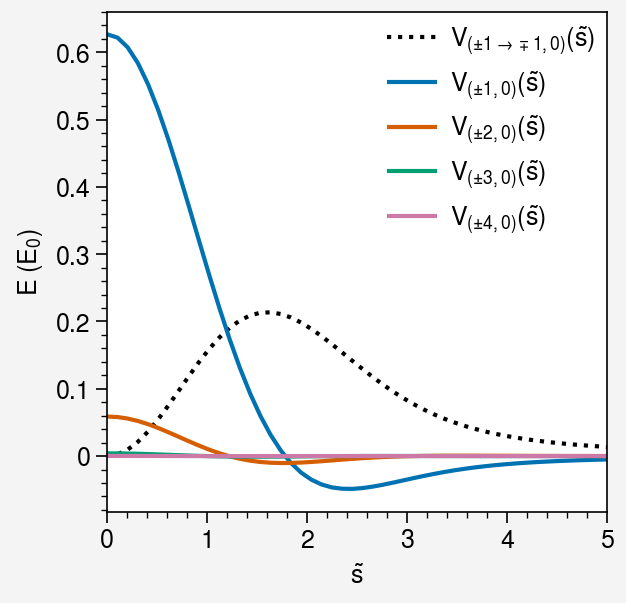

In [335]:
#Plot of s-dependence of several matrix elements

omg = 10

L = np.sqrt(hbar**2/(omg*mStar))
E0 = eSquaredOvere0/(dielectricConstant*L)

d=0

xTildeMin = 0
xTildeMax = 5
numxTildeVals = 50

xTildeVals = np.linspace(xTildeMin, xTildeMax, numxTildeVals)

numMatElts = 4

VsTwoHoleofsTilde = np.zeros((numMatElts+1,numxTildeVals))

for xTildeIndex in range(numxTildeVals):
    xTilde = xTildeVals[xTildeIndex]
    for i in range(1,numMatElts+1):
        VTwoHole01s = ed.Coul_hh_generalSeparation(d, xTilde,omg,i,0,0,0,0,0,0,0,0,0,0,0,i,0,0,0)/E0
        VTwoHoleFlips = ed.Coul_hh_generalSeparation(d, xTilde,omg,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0)/E0
        VsTwoHoleofsTilde[0, xTildeIndex] = VTwoHoleFlips
        VsTwoHoleofsTilde[i, xTildeIndex] = VTwoHole01s

array = [
    [1],
]

fig = pplt.figure(share=0, refwidth=2.5)#, refaspect = 1.333)
axs = fig.subplots(array)

axs.format(
    abc = False,
    grid= False
)

axs[0].plot(xTildeVals, VsTwoHoleofsTilde[0], color = 'black', linestyle = 'dotted', label = r'$V_{(\pm 1 \rightarrow \mp 1, 0)}(\tilde{s})$')

for i in range(1,numMatElts+1):
    axs[0].plot(xTildeVals, VsTwoHoleofsTilde[i], label = r'$V_{(\pm %s, 0)}(\tilde{s})$' % i)

axs[0].format(xlabel = r'$\tilde{s}$', ylabel = r'$E$ $(E_0)$')#, xscale='log', yscale='log')

axs[0].legend(loc='ur', ncols=1, frame=False)

plt.savefig('MatrixElementsvssTilde.pdf', bbox_inches='tight')

In [2]:
omghSpectrum = 1

L = np.sqrt(hbar**2/(omghSpectrum*mStar))
print(L)
coulombEnergy = eSquaredOvere0/(L)

coulOverOmghMin = 0.0001
coulOverOmghMax = 8
numCoulOverOmghVals = 100
coulOverOmghVals = np.linspace(coulOverOmghMin, coulOverOmghMax, numCoulOverOmghVals)
epsVals = coulombEnergy/omghSpectrum/coulOverOmghVals

N=12
numLevelstoPlot = 60

megaEigVals_s = np.zeros((numLevelstoPlot, numCoulOverOmghVals))
megaEigVals_a = np.zeros((numLevelstoPlot, numCoulOverOmghVals))

index = 0

for eps in epsVals:
    basis = ed.nonint_basis_symmetric(N, omghSpectrum)
    basis_a = ed.nonint_basis_antisymmetric(N, omghSpectrum)
    E,nRp,nRm,nrp,nrm = basis
    E_a,nRp_a,nRm_a,nrp_a,nrm_a = basis_a
    Es_s,evecs_s,Es_a,evecs_a = ed.ED_hh(basis,basis_a,omghSpectrum, mStar, eps)
    megaEigVals_s[:, index] = Es_s[0:numLevelstoPlot]
    megaEigVals_a[:, index] = Es_a[0:numLevelstoPlot]
    if index == 0:
        states = np.concatenate(basis[1:5]).flatten()
        states_a = np.concatenate(basis_a[1:5]).flatten()
        basisStatesMatrix_s = np.reshape(states, (4,np.shape(basis[0])[0]))
        basisStatesMatrix_a = np.reshape(states_a, (4,np.shape(basis_a[0])[0]))
        lArray_s = np.zeros(np.shape(evecs_s)[0])
        levelArray_s = np.zeros(np.shape(evecs_s)[0])
        lArray_a = np.zeros(np.shape(evecs_s)[0])
        levelArray_a = np.zeros(np.shape(evecs_s)[0])
        for eigenStateIndex in range(np.shape(evecs_s)[0]):
            eigenState_s = evecs_s[:, eigenStateIndex]
            basisStateIndex_s = np.argmax(eigenState_s)
            basisState_s = basisStatesMatrix_s[:, basisStateIndex_s]
            l_s = basisState_s[0] + basisState_s[2] - basisState_s[1] - basisState_s[3]
            lArray_s[eigenStateIndex] = int(l_s)
            levelArray_s[eigenStateIndex] = int(Es_s[eigenStateIndex]/omghSpectrum) - 2
        for eigenStateIndex in range(np.shape(evecs_a)[0]):
            eigenState_a = evecs_a[:, eigenStateIndex]
            basisStateIndex_a = np.argmax(eigenState_a)
            basisState_a = basisStatesMatrix_a[:, basisStateIndex_a]
            l_a = basisState_a[0] + basisState_a[2] - basisState_a[1] - basisState_a[3]
            lArray_a[eigenStateIndex] = int(l_a*(1.01))
            levelArray_a[eigenStateIndex] = int(Es_a[eigenStateIndex]/omghSpectrum) - 2
    index += 1
    
#HEISENBERG uncertainty principle MINIMIZATION
    
from sympy import *

x = symbols('x')

cVals = np.linspace(0,coulOverOmghMax,100)

solutions = np.zeros((2, 100))

for cValIndex in range(np.shape(cVals)[0]):
    c = cVals[cValIndex]
    solutions[:, cValIndex] = np.array(list(solveset(Eq(x**4-c*x-1, 0), x, domain=Reals)))
    
energies = (1/2)*(solutions**(-2)+solutions**(2)+2*cVals*solutions**(-1))+1

fig, ax = plt.subplots()

ax.plot(coulOverOmghVals, coulOverOmghVals*np.sqrt(np.pi)+2, linestyle='dotted', color ='black') # first order perturbation theory prediction
ax.plot(cVals, energies[1], linestyle='dashed', color = 'black')
#axs[1].plot(cVals, energies[1]-megaEigVals_s[0]/omghSpectrum, color = 'red')

print(megaEigVals_s/omghSpectrum)


for ELevelIndex in range(numLevelstoPlot):    
    if ELevelIndex == 0:
        ax.plot(coulOverOmghVals, megaEigVals_s[ELevelIndex]/omghSpectrum, color = 'black', label = r'$n_{R+}=%d, n_{R-}=%d$; $n_{r+} = %d, n_{r-}$ = %d' % (basisStatesMatrix_s[0,ELevelIndex], basisStatesMatrix_s[1,ELevelIndex], basisStatesMatrix_s[2,ELevelIndex], basisStatesMatrix_s[3,ELevelIndex]))
        
#ax.legend(loc = 'best', frameon=False)
ax.margins(0)
ax.tick_params(which='both',direction='in')


"""
for ELevelIndex in range(numLevelstoPlot):
    axs[0].plot(coulOverOmghVals, megaEigVals_s[ELevelIndex]/omgh, color = 'black', label = r'n=%d, l=%d' % (levelArray_s[ELevelIndex], lArray_s[ELevelIndex]))
    if ELevelIndex > 0:
        axs[1].plot(coulOverOmghVals, (megaEigVals_s[ELevelIndex]-megaEigVals_s[0])/omgh, color = 'black', label = r'n=%d, l=%d' % (levelArray_s[ELevelIndex], lArray_s[ELevelIndex]))
    
for ELevelIndex in range(numLevelstoPlot):
    axs[0].plot(coulOverOmghVals, megaEigVals_a[ELevelIndex]/omgh, color = 'blue', linestyle = 'dashed', label = r'n=%d, l=%d' % (levelArray_a[ELevelIndex], lArray_a[ELevelIndex]))
    axs[1].plot(coulOverOmghVals, (megaEigVals_a[ELevelIndex]-megaEigVals_s[0])/omgh, color = 'blue', linestyle = 'dashed', label = r'n=%d, l=%d' % (levelArray_a[ELevelIndex], lArray_a[ELevelIndex]))
"""

    
ax.set(xlabel=r'$\lambda$', ylabel = r'$E_g$ ($\hbar\Omega$)', ylim = (2,8))

plt.savefig('EDGroundStateSpectrum%s.pdf' % date, bbox_inches='tight')

fig, ax = plt.subplots()

for ELevelIndex in range(numLevelstoPlot):    
    ax.plot(coulOverOmghVals, (megaEigVals_s[ELevelIndex]-megaEigVals_s[0])/omghSpectrum, color = 'black')#, label = r'nR+=%d, nR-=%d; nr+ = %d, nr- = %d' % (basisStatesMatrix_s[0,ELevelIndex], basisStatesMatrix_s[1,ELevelIndex], basisStatesMatrix_s[2,ELevelIndex], basisStatesMatrix_s[3,ELevelIndex]))
    
for ELevelIndex in range(numLevelstoPlot):
    #axs[0].plot(coulOverOmghVals, megaEigVals_a[ELevelIndex]/omghSpectrum, color = 'black', linewidth='1', linestyle = 'dashed', label = r'$n_{R+}=%d, n_{R-}=%d$; $n_{r+} = %d, n_{r-} = %d$' % (basisStatesMatrix_a[0,ELevelIndex], basisStatesMatrix_a[1,ELevelIndex], basisStatesMatrix_a[2,ELevelIndex], basisStatesMatrix_a[3,ELevelIndex]))
    ax.plot(coulOverOmghVals, (megaEigVals_a[ELevelIndex]-megaEigVals_s[0])/omghSpectrum, color = 'black', linestyle = 'dashed')#, label = r'nR+=%d, nR-=%d; nr+ = %d, nr- = %d' % (basisStatesMatrix_a[0,ELevelIndex], basis_a[1,ELevelIndex], basisStatesMatrix_a[2,ELevelIndex], basisStatesMatrix_a[3,ELevelIndex]))
    
    
ax.set(xlabel=r'$\lambda$', ylabel = r'$(E-E_{g})$ ($\hbar\Omega$)', ylim = (-0.2,3.2))
#axs[0].legend(loc='right', frame=False, ncols = 1)
#axs[1].legend(loc='right', frame=False, ncols = 1)

ax.margins(0)
ax.tick_params(which='both',direction='in')

plt.savefig('EDSpectrumGap%s.pdf' % date, bbox_inches='tight')


### Line Labels
"""
axs[0].text(0.25,8.5,r'$n, l$')
axs[0].text(5,4.7,r'$3, \pm 2$')
axs[0].text(7.5,4.4, r'$3, 0$')
axs[0].text(7,4.1,r'$3, \pm 2$')

axs[0].text(7,3.2,r'$n=1, l=\pm 1$')

axs[0].text(7,2.5,r'$n=0, l=0$')
"""

#axs[1].legend()

90.66192332903675


TypeError: ED_hh() missing 1 required positional argument: 'dielectricConstant'

NameError: name 'megaEigVals_s' is not defined

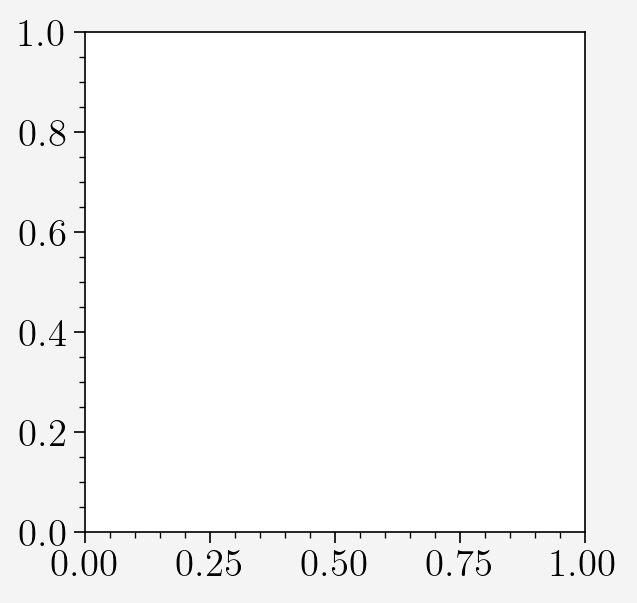

In [4]:
array = [
    [1],
]

fig = pplt.figure(share=0, refwidth=2.5)#, refaspect = 1.333)
axs = fig.subplots(array)

axs.format(
    abc = False,
    grid = False
)

#axs[1].plot(cVals, energies[1]-megaEigVals_s[0]/omghSpectrum, color = 'red')

print(megaEigVals_s/omghSpectrum)


for ELevelIndex in range(numLevelstoPlot):    
    axs[0].plot(coulOverOmghVals, (megaEigVals_s[ELevelIndex])/omghSpectrum, color = 'black', linewidth='1')#, label = r'nR+=%d, nR-=%d; nr+ = %d, nr- = %d' % (basisStatesMatrix_s[0,ELevelIndex], basisStatesMatrix_s[1,ELevelIndex], basisStatesMatrix_s[2,ELevelIndex], basisStatesMatrix_s[3,ELevelIndex]))
    
for ELevelIndex in range(numLevelstoPlot):
    #axs[0].plot(coulOverOmghVals, megaEigVals_a[ELevelIndex]/omghSpectrum, color = 'black', linewidth='1', linestyle = 'dashed', label = r'$n_{R+}=%d, n_{R-}=%d$; $n_{r+} = %d, n_{r-} = %d$' % (basisStatesMatrix_a[0,ELevelIndex], basisStatesMatrix_a[1,ELevelIndex], basisStatesMatrix_a[2,ELevelIndex], basisStatesMatrix_a[3,ELevelIndex]))
    axs[0].plot(coulOverOmghVals, (megaEigVals_a[ELevelIndex])/omghSpectrum, color = 'black', linewidth='1', linestyle = 'dashed')#, label = r'nR+=%d, nR-=%d; nr+ = %d, nr- = %d' % (basisStatesMatrix_a[0,ELevelIndex], basis_a[1,ELevelIndex], basisStatesMatrix_a[2,ELevelIndex], basisStatesMatrix_a[3,ELevelIndex]))
    
"""
for ELevelIndex in range(numLevelstoPlot):
    axs[0].plot(coulOverOmghVals, megaEigVals_s[ELevelIndex]/omgh, color = 'black', label = r'n=%d, l=%d' % (levelArray_s[ELevelIndex], lArray_s[ELevelIndex]))
    if ELevelIndex > 0:
        axs[1].plot(coulOverOmghVals, (megaEigVals_s[ELevelIndex]-megaEigVals_s[0])/omgh, color = 'black', label = r'n=%d, l=%d' % (levelArray_s[ELevelIndex], lArray_s[ELevelIndex]))
    
for ELevelIndex in range(numLevelstoPlot):
    axs[0].plot(coulOverOmghVals, megaEigVals_a[ELevelIndex]/omgh, color = 'blue', linestyle = 'dashed', label = r'n=%d, l=%d' % (levelArray_a[ELevelIndex], lArray_a[ELevelIndex]))
    axs[1].plot(coulOverOmghVals, (megaEigVals_a[ELevelIndex]-megaEigVals_s[0])/omgh, color = 'blue', linestyle = 'dashed', label = r'n=%d, l=%d' % (levelArray_a[ELevelIndex], lArray_a[ELevelIndex]))
"""

ax.tick_params(which='both',direction='in')

axs[0].format(xlabel=r'$\lambda$', ylabel = r'$E$ ($\hbar\Omega$)', ylim = (2,8))#, xlim = (1.75,2.25))

#axs[0].legend(loc='right', frame=False, ncols = 1)
#axs[1].legend(loc='right', frame=False, ncols = 1)


### Line Labels
"""
axs[0].text(0.25,8.5,r'$n, l$')
axs[0].text(5,4.7,r'$3, \pm 2$')
axs[0].text(7.5,4.4, r'$3, 0$')
axs[0].text(7,4.1,r'$3, \pm 2$')

axs[0].text(7,3.2,r'$n=1, l=\pm 1$')

axs[0].text(7,2.5,r'$n=0, l=0$')
"""

#axs[1].legend()


plt.savefig('EDForMarchMeetingPresentation.pdf', bbox_inches='tight')

In [4]:
#Checking that Coul_hh produces expected values for matrix elements
V = ed.Coul_hh(omghSpectrum,0,0,0,0,0,0,0,0)
print(V)
print((V/(coulombEnergy/dielectricConstant))/(np.sqrt(np.pi)))
print(np.sqrt(np.pi)/2)
print(eSquaredOvere0)

##IT all adds up!

286.9256326228441
1.0000000000000002
0.8862269254527579
14400


[[-182.31517041 -180.48285714 -178.65054387 ...  178.65054387
   180.48285714  182.31517041]
 [-182.31517041 -180.48285714 -178.65054387 ...  178.65054387
   180.48285714  182.31517041]
 [-182.31517041 -180.48285714 -178.65054387 ...  178.65054387
   180.48285714  182.31517041]
 ...
 [-182.31517041 -180.48285714 -178.65054387 ...  178.65054387
   180.48285714  182.31517041]
 [-182.31517041 -180.48285714 -178.65054387 ...  178.65054387
   180.48285714  182.31517041]
 [-182.31517041 -180.48285714 -178.65054387 ...  178.65054387
   180.48285714  182.31517041]]

[[-182.31517041 -182.31517041 -182.31517041 ... -182.31517041
  -182.31517041 -182.31517041]
 [-180.48285714 -180.48285714 -180.48285714 ... -180.48285714
  -180.48285714 -180.48285714]
 [-178.65054387 -178.65054387 -178.65054387 ... -178.65054387
  -178.65054387 -178.65054387]
 ...
 [ 178.65054387  178.65054387  178.65054387 ...  178.65054387
   178.65054387  178.65054387]
 [ 180.48285714  180.48285714  180.48285714 ...  180.48285

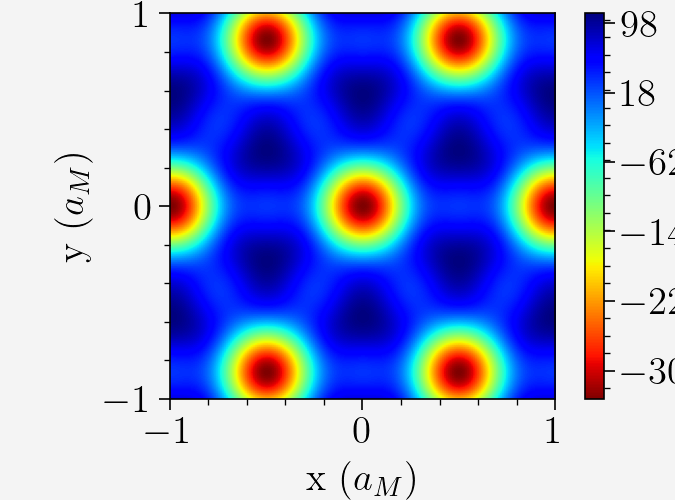

In [50]:
import scipy.linalg as la
def kronDelta(a,b):
    if np.array_equal(a,b):
        return(1)
    else:
        return(0)
#define interlayer twist angle in radians
N = 5
theta = 1 * math.pi/180
numShells = 3
# define lattice constant as a in angstrom
a = 3.182 # atomic lattice constant in Å

# (calculated from approximation in Allan's paper, where theta should indeed be in radians)
am = a/theta
# define reciprocal basis vectors b1 and b2 for moire lattice
b1 = (4*math.pi/math.sqrt(3)) * (1/am) * np.array([1,0])
b2 = (4*math.pi/math.sqrt(3)) * (1/am) * np.array([0.5, math.sqrt(3)/2])
K = ((b1+b2)/np.linalg.norm(b1+b2)) * (np.linalg.norm(b1)/math.sqrt(3))
# define function to compute V, defined at sublattice reciprocal lattice sites
# for now, only defined to work for first shell
# v and phi are fitted parameters, where V(b1) = v*exp(i*phi)
modStrengthFactor = 1

V1 = 39.45 * modStrengthFactor #meV
V2 = 6.5 * modStrengthFactor #meV
V3 = 10.0 * modStrengthFactor #meV
phi = math.pi
electronMass = 5.856301 * 10**(-29)
mStar = 0.9 * electronMass

hbar = 6.582 * 10**(-13) # meV * s
# b = n*b1 + m*b2 and therefore b is a reciprocal lattice vector
# define function that compute all g vectors within shell n or shells lower than n

def computeShell(n):
    shell = np.array([])
    gCount = 0
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            g = i * b1 + j * b2
            if la.norm(g) <= la.norm(n*b1):
                if i + j <= n:
                    if -(j + i) <= n:
                        shell = np.append(shell, g)
                        gCount += 1
    shell = shell.reshape(gCount, 2)
    shell = np.delete(shell, gCount//2, 0)
    scrapShell = shell
    normArray = np.array([])
    for i in range(gCount-1):
        normArray = np.append(normArray, la.norm(scrapShell[i]))
    finalShellNorms = np.unique(normArray)
    newFinalShellNorms = np.array([])
    for i in finalShellNorms:
        redundant = False
        for j in newFinalShellNorms:
            if np.allclose(i,j):
                redundant = True
        if redundant == False:
            newFinalShellNorms = np.append(newFinalShellNorms, i)
    finalShellNorms = newFinalShellNorms
    finalShell = np.array([])
    finalShellCount = 0
    for i in range(n):
        normVal = finalShellNorms[i]
        for j in shell:
            if np.allclose(la.norm(j), normVal):
                finalShellCount += 1
                finalShell = np.append(finalShell, j)
    finalShell = np.append(finalShell, [0,0])
    finalShell = finalShell.reshape(finalShellCount+1, 2)
    return(finalShell)

# define gVals
shells = computeShell(numShells)
#shells = np.append(shells, np.array([0,0]))
#shells = shells.reshape(finalShellCount+1, 2)
gVals = shells
numBands = np.shape(shells)[0]

def computeV(b, V1 = V1, V2 = V2, V3 = V3, phi = phi, gVectors = shells, b1 = b1):
    if np.allclose(la.norm(b), la.norm(b1)):
        V = V1 * np.exp(complex(0,phi))
        return(V)
    elif np.allclose(la.norm(b), np.sqrt(3)*la.norm(b1)):
        V = V2 * np.exp(complex(0,phi))
        return(V)
    elif np.allclose(la.norm(b), 2*la.norm(b1)):
        V = V3 * np.exp(complex(0,phi))
        return(V)
    return(0)

def computeDeltar(r, shells = shells):
    deltar = 0
    for j in shells: # j is reciprocal lattice site within i in the basis (b1,b2)
        V = computeV(j)
        #b = j[0] * b1 + j[1] * b2 # b is j but now in the (xhat, yhat) basis
        jdotr = np.dot(j,r)
        deltar += V * complex(math.cos(jdotr), math.sin(jdotr))
    return(np.real(deltar)) ### real to eliminate any artifact complex component due to python approximation
# numList is a list of sample points rx and ry values to make computation
numPoints = 200
numList = np.linspace(-1*am,1*am, numPoints)
# compute V as a function of r
def computeDeltarArray(numList = numList):
    deltarArray = np.array([])
    for i in numList:
        for j in numList:
            r = np.array([i,j])
            deltar = computeDeltar(r)
            deltarArray = np.append(deltarArray, deltar)
    deltarArray = deltarArray.reshape((len(numList),len(numList)))
    return(deltarArray)

deltarArray = computeDeltarArray()

deltaList = np.reshape(deltarArray, [np.shape(deltarArray)[0]*np.shape(deltarArray)[1]])
xListScatter = np.zeros([numPoints, numPoints])
yListScatter = np.zeros([numPoints, numPoints])
for i in range(np.shape(numList)[0]):
    num = numList[i]
    yListScatter[i]+=num
    xListScatter[:,i]+=num

print(xListScatter)
print()
print(yListScatter)
print()

xListScatter = np.reshape(xListScatter, [np.shape(deltarArray)[0]*np.shape(deltarArray)[1]])
yListScatter = np.reshape(yListScatter, [np.shape(deltarArray)[0]*np.shape(deltarArray)[1]])


fix, ax = plt.subplots()
imshow = ax.imshow(deltarArray, cmap = 'jet_r', origin = 'lower', extent = [-1,1,-1,1])
plt.xlabel(r'x $(a_M)$')
plt.ylabel(r'y $(a_M)$')
plt.tight_layout(pad = 0)
plt.margins(0)
ax.set_aspect('equal', adjustable='box')
plt.xticks(np.array([-1,0,1]))
plt.yticks(np.array([-1,0,1]))
cbar = plt.colorbar(imshow, ticks = np.linspace(np.min(deltarArray), np.max(deltarArray), 6)*0.9//1)

cbar.ax.set_ylabel(r'$\Delta(\mathbf{r})$ $(meV)$')

#ax.set_ylim((-50*theta*(180/math.pi)*modStrengthFactor,5))
#plt.xlabel(r'k ($\gamma - M - \kappa - \gamma$) in units of |$\vec{b_1}$|')
#scaleFactor = ((1/2 + 1/4 + math.sqrt(3)/4))**(-1) *(math.pi/2)
#ax.set_xticks([0,KScale, MScale, GammaScale])
#ax.set_xticklabels([r'$\Gamma$', r'$K$', r'$M$', r'$\Gamma$'])
#plt.title(r"Band Structure of $WS_2$ on $WS_2$ ($\theta}$ = %sº) (numShells = %s) (modFactor = %s)" % ((theta *(180/math.pi)), numShells, modStrengthFactor))
#ax.tick_params(direction = "in")
#ax.tick_params(which = 'minor', direction = "in")
plt.margins(0)
#plt.legend(frameon=False)
plt.savefig('moirePotentialImshow%s.pdf' % date, bbox_inches='tight')
plt.show()

92.73669534121595
[39] [49]
[0.59183673]
[1.]


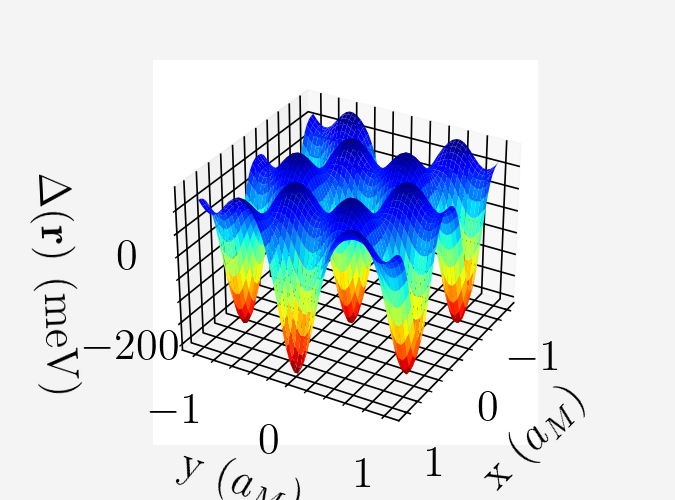

In [18]:
ax = plt.axes(projection='3d')
#ax.format(grid=False)
X,Y = np.meshgrid(numList/am,numList/am)
ax.plot_surface(X, Y, 1*deltarArray, cmap='jet_r')
ax.view_init(30, 30)
ax.set(xlabel=r'x $(a_M)$', ylabel=r'y $(a_M)$', zlabel = r'$\Delta(\mathbf{r})$ (meV)')
#ax.set_xlim(-0.5,0.5)
#ax.set_ylim(-0.5,0.5)
plt.savefig('moirePotential3dContour.pdf')
#plt.savefig('moirePotential3dContour.pdf')


print(np.amax(deltarArray))
xMax, yMax = np.where(deltarArray==np.amax(deltarArray))
print(xMax, yMax)
print(numList[xMax]/am)
print(numList[yMax]/am)


-92.93371749315025


ValueError: shape mismatch: objects cannot be broadcast to a single shape

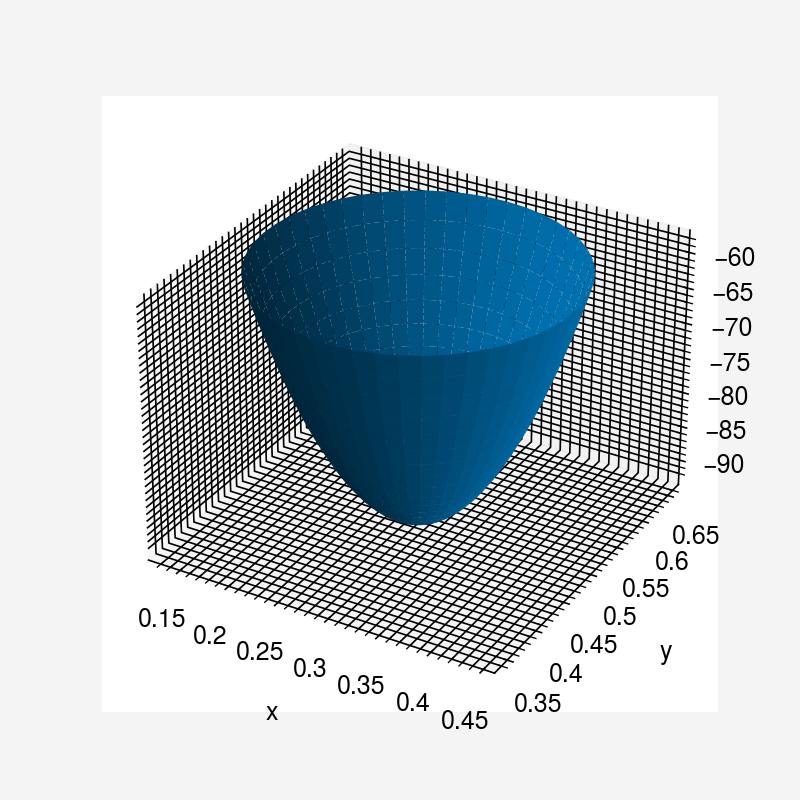

In [313]:
def computeDeltar(r, shells = shells):
    deltar = 0
    for j in shells: # j is reciprocal lattice site within i in the basis (b1,b2)
        V = computeV(j)
        #b = j[0] * b1 + j[1] * b2 # b is j but now in the (xhat, yhat) basis
        jdotr = np.dot(j,r)
        deltar += V * complex(math.cos(jdotr), math.sin(jdotr))
    return(np.real(deltar)) ### real to eliminate any artifact complex component due to python approximation
# numList is a list of sample points rx and ry values to make computation

# compute V as a function of r
def computeDeltarArray(numListX, numListY):
    deltarArray = np.array([])
    for i in numListX:
        for j in numListY:
            r = np.array([i,j])
            deltar = computeDeltar(r)
            deltarArray = np.append(deltarArray, deltar)
    deltarArray = deltarArray.reshape((len(numListX),len(numListY)))
    return(deltarArray)

numPoints = 30
#numListAboutMaximumY = np.linspace((0.5-0.15)*am,(0.5+0.15)*am, numPoints)
#numListAboutMaximumX = np.linspace(((np.sqrt(3)/4)-0.3)*am,((np.sqrt(3)/4)+0)*am, numPoints)

numListAboutMaximumY = np.linspace((0.5-0.15)*am,(0.5+0.15)*am, numPoints)
numListAboutMaximumX = np.linspace(((1/(2*np.sqrt(3)))-0.15)*am,((1/(2*np.sqrt(3)))+0.15)*am, numPoints)

deltarArrayAboutMaximum = computeDeltarArray(numListAboutMaximumX, numListAboutMaximumY)
ax = plt.axes(projection='3d')
X,Y = np.meshgrid(numListAboutMaximumX/am,numListAboutMaximumY/am)
ax.plot_surface(X, Y, -deltarArrayAboutMaximum, cmap = 'jet', vmin =np.min(-deltarArray), vmax= np.max(-deltarArray), zorder = 2)
ax.set(xlabel='x', ylabel='y')
#ax.set_xlim(-0.5,0.5)
#ax.set_ylim(-0.5,0.5)
#plt.savefig('moirePotential3dContour.pdf')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 0.15, 20)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R)**2)*(10.52)**2 * (28.35/2)

# Express the mesh in the cartesian system.
X, Y = (R*np.cos(P), R*np.sin(P))
print(np.amin(-deltarArrayAboutMaximum))
# Plot the surface.
ax.plot_surface(X+(1/(2*np.sqrt(3))), Y+0.5, Z+np.amin(-deltarArrayAboutMaximum), zorder = 1)

In [6]:
def calculateGammaofN(theta, numGammaNContinuumModel):
    cmb.theta = theta * np.pi/180 # twist angle
    cmb.N = 7 #7 ### Creates NxN k space mesh. N MUST BE ODD!!!!!
    cmb.numShells = 9 # number of reciprocal lattice vector shells
    cmb.modStrengthFactor = 1 #multiplicative factor for moire potential
    cmb.a = 3.18 # atomic lattice constant in Å
    cmb.V1 = 33.5 * cmb.modStrengthFactor #meV
    cmb.V2 = 4.0 * cmb.modStrengthFactor #meV
    cmb.V3 = 5.5 * cmb.modStrengthFactor #meV
    cmb.phi = np.pi #phase that enters moiré potential Fourier expansion
    cmb.electronMass = 5.856301 * 10**(-29) # meV *(second/Å)
    cmb.mStar = 0.87 * cmb.electronMass # effective mass at untwisted bilayer valence band maximum
    cmb.hbar = 6.582 * 10**(-13) # meV * s
    cmb.SquareMetersPerSqareAngstrom = 10**(-20)
    cmb.am = cmb.a/cmb.theta #moiré period in linear approximation
    cmb.A = (cmb.am**2) * np.sqrt(3)/2 * cmb.N**2 # define total lattice area A
    cmb.b1 = (4*np.pi/np.sqrt(3)) * (1/cmb.am) * np.array([1,0]) # define reciprocal basis vectors b1 and b2 for moire lattice
    cmb.b2 = (4*np.pi/np.sqrt(3)) * (1/cmb.am) * np.array([0.5, np.sqrt(3)/2])
    cmb.a1 = cmb.am * np.array([np.sqrt(3)/2, -1/2]) # define real basis vectors a1 and a2 for moire lattice
    cmb.a2 = cmb.am * np.array([0, 1])
    cmb.K = np.array([0,1])*(np.linalg.norm(cmb.b1)/np.sqrt(3))#((b1+b2)/np.linalg.norm(b1+b2)) * (np.linalg.norm(b1)/np.sqrt(3))
    cmb.shells = cmb.computeShell(cmb.numShells)
    cmb.shells = cmb.computeShell(cmb.numShells)
    cmb.gVals = cmb.shells#computeShell(np.floor(numShells/2))
    cmb.numgVals = np.shape(cmb.gVals)[0]
    cmb.numBands = np.shape(cmb.shells)[0]
    cmb.mesh, cmb.reducedMesh, cmb.reducedMeshCounter, cmb.meshToReducedMeshIndexMap = cmb.computeMesh()
    cmb.numMesh = np.shape(cmb.mesh)[0]
    cmb.numRedMesh = np.shape(cmb.reducedMesh)[0]
    megaEigValArray, megaEigVecArray = cmb.computeMegaEigStuff()
    megaEigValArray = megaEigValArray - np.max(megaEigValArray)
    GammaofNContinuumModel = np.zeros(numGammaNContinuumModel)
    count = 0
    for NIndex in range(numGammaNContinuumModel):
        Ndegen = 2*(2*NIndex+1)
        #print(Ndegen)
        bandSet = megaEigValArray[:,np.shape(megaEigValArray)[1]-count-Ndegen:(np.shape(megaEigValArray)[1]-count)]
        #print(np.shape(bandSet))
        #print(bandSet)
        GammaofNContinuumModel[NIndex] += np.sqrt(np.var(bandSet))
        count += Ndegen
    return(GammaofNContinuumModel)

28.353079575610046
28.353079575610046
163.04439661646754
[0 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]


Text(0.5, 1.0, 'moiré atom, $\\theta=1$º')

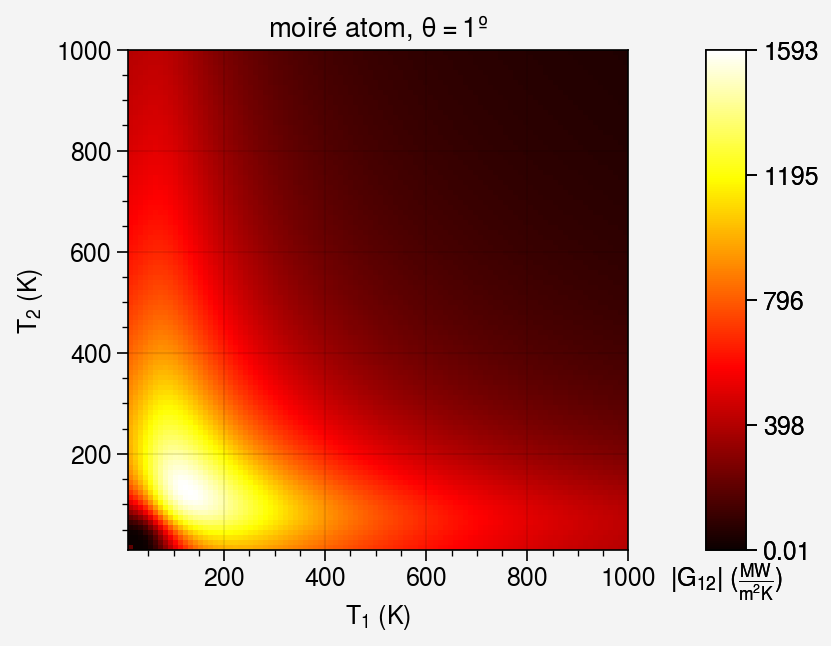

In [7]:
a0 = 3.18
m = 0.87
V1 = 33.5
V2 = 4.0
V3 = 5.5
dielectricConstant = 5.1
eSquaredOvere0 =  14400 #meV * angstrom

def computeParameters(theta):
    aM = a0*(180/np.pi)/theta # angstroms
    gamma = 4*np.pi**2*(V1+6*V2+4*V3) # meV
    hbaromega = hbar*np.sqrt(gamma/mStar)/aM # sqrt(meV/electron mass)/angstrom
    l = np.sqrt(hbar**2/(mStar*hbaromega))
    coulombEnergy = eSquaredOvere0/(dielectricConstant*l) # e^2 = 1.44 eV*nm
    ratio = coulombEnergy/hbaromega
    return(aM, gamma, hbaromega, l, coulombEnergy, ratio)

theta = 1

N = 3 # cuts off number of energy levels beyond ground state(note that this is NOT equivalent to the number of states since the levels are degenerate)

numEStatesIncluded = 3 #np.shape(basisStatesMatrix)[1] #5 # cuts off number of states to sum over in Fermi's golden rule

GammaofN = calculateGammaofN(theta, N)
            
#Calculate G

numTVals = 50
TMin = 10
TMax = 1000
TVals = np.linspace(TMin,TMax,numTVals)
GVals = np.zeros((numTVals, numTVals))

dTilde = 0
sTilde = 0
epsForED = dielectricConstant
epsForEnergyTransfer = dielectricConstant
aM, gamma, hbaromega, l, coulombEnergy, ratio = computeParameters(theta) #angstroms, meV, meV, nm, meV, dimensionless

print(hbaromega)

E0 = eSquaredOvere0/(dielectricConstant*l)

A = (aM**2) * math.sqrt(3)/2 # real space moire unit cell area

Gamma0 = 1 #mev, line broadening factor

numTVals = 100
TMin = 10
TMax = 1000
TVals = np.linspace(TMin,TMax,numTVals)
GVals = np.zeros((numTVals, numTVals))
Kb = 0.08617 # meV per Kelvin
hbar = 6.582 * 10**(-13) # meV * s
JoulesPermeV = 1.602 * 10**(-22)
SquareMetersPerSqareAngstrom = 10**(-20)
electronMass = 5.856301 * 10**(-29) # meV *(second/Å)


dTilde = 0
sTilde = 0

epsForED = 10000*dielectricConstant
epsForEnergyTransfer = dielectricConstant
aM, gamma, hbaromega, l, coulombEnergy, ratio = computeParameters(theta) #angstroms, meV, meV, nm, meV, dimensionless

print(hbaromega)

A = (aM**2) * math.sqrt(3)/2 # real space moire unit cell area

print(E0)

omgh = hbaromega

cutoff = 0.01

omgh = hbaromega 

basis = ed.nonint_basis_symmetric(N,omgh)

basis_a = ed.nonint_basis_antisymmetric(N,omgh)

E,nRp,nRm,nrp,nrm = basis

states = np.concatenate(basis[1:5]).flatten()
basisStatesMatrix = np.reshape(states, (4,np.shape(basis[0])[0])) #basis states matrix has each column a direct product state with each row its quantum numbers (n1+,n1-,n2+,n2-)

Es_s,evecs_s,Es_a,evecs_a = ed.ED_hh(basis, basis_a, omgh, epsForED)

#numEStatesIncluded = np.shape(basisStatesMatrix)[1] #5 # cuts off number of states to sum over in Fermi's golden rule

eigenstateIndextoNArraySym,evecsIGNORE,eigenstateIndextoNArrayAntiSym,evecs_aIGNORE = ed.ED_hh(basis, basis_a, omgh, 10000*dielectricConstant)

eigenstateIndextoNArraySym = (np.floor(eigenstateIndextoNArraySym/omgh)-2).astype(int)
eigenstateIndextoNArrayAntiSym = (np.floor(eigenstateIndextoNArrayAntiSym/omgh)-2).astype(int)

print(eigenstateIndextoNArraySym)

"""
def computeEigenstateIndextoNArray(N):
    numStates=0
    for n in range(N):
        nDegen = int(((n+1)*(n+2)*(n+3))/6)
        numStates += nDegen
    eigenstateIndextoNArray = np.zeros(numStates)
    startIndex=0
    for n in range(N):
        nDegen = int(((n+1)*(n+2)*(n+3))/6)
        print(nDegen)
        eigenstateIndextoNArray[startIndex:(startIndex+nDegen)] += n
        startIndex += nDegen
    return(eigenstateIndextoNArray)

eigenstateIndextoNArray = computeEigenstateIndextoNArray(N)
"""

@njit
def computePartitionFunction(beta):
    Z=0
    for energyValIndex in range(numEStatesIncluded):
        energyVal = Es_s[energyValIndex]
        Z+=np.exp(-(energyVal)*beta)
    return(Z)

@njit
def computeDetailedBalance(eStateEnergy, eStatePrimeEnergy, beta1, beta2, Z1, Z2):
    detailedBalance = ((2*Z1*Z2)**(-1))*(np.exp(-(eStateEnergy)*(beta1))*np.exp(-eStatePrimeEnergy*beta2) - np.exp(-(eStateEnergy)*beta2)*np.exp(-eStatePrimeEnergy*beta1))
    return(detailedBalance)

@njit
def computeLorentzianFactor(eigenstateAiIndex, eigenstateAjIndex, eigenstateBiIndex, eigenstateBjIndex):
    detuning = abs(Es_s[eigenstateAiIndex]-Es_s[eigenstateAjIndex])-abs(Es_s[eigenstateBiIndex]-Es_s[eigenstateBjIndex])
    NAi = eigenstateIndextoNArraySym[eigenstateAiIndex]
    NAj = eigenstateIndextoNArraySym[eigenstateAjIndex]
    GammaAi = GammaofN[NAi] #doesnt work once bands start crossing, need to revise
    GammaAj = GammaofN[NAj] #doesnt work once bands start crossing
    NBi = eigenstateIndextoNArraySym[eigenstateAiIndex]
    NBj = eigenstateIndextoNArraySym[eigenstateAjIndex]
    GammaBi = GammaofN[NBi] #doesnt work once bands start crossing, need to revise
    GammaBj = GammaofN[NBj] #doesnt work once bands start crossing
    Gamma = GammaAi+GammaAj+GammaBi+GammaBj+4*Gamma0
    lorentzianFactor = (1/np.pi)*(Gamma/2)/((detuning)**2-(Gamma/2)**2)
    return(lorentzianFactor)
    
def computeEnergyTransfer(T1, T2, d=0, s=0):
    beta1 = 1/(T1*Kb)
    beta2 = 1/(T2*Kb)
    Z1 = computePartitionFunction(beta1)
    Z2 = computePartitionFunction(beta2)
    QDot = 0
    for eigenstateAiIndex in range(numEStatesIncluded):
        eigenStateAiEnergy = Es_s[eigenstateAiIndex]
        for eigenstateAjIndex in range(numEStatesIncluded):
            eigenStateAjEnergy = Es_s[eigenstateAjIndex]
            for eigenstateBiIndex in range(numEStatesIncluded):
                eigenStateBiEnergy = Es_s[eigenstateBiIndex]
                for eigenstateBjIndex in range(numEStatesIncluded):
                    eigenStateBjEnergy = Es_s[eigenstateBjIndex]
                    V = ed.Coul_estateestate(d, s, eigenstateAiIndex, eigenstateAjIndex, eigenstateBiIndex, eigenstateBjIndex, cutoff, omgh, basisStatesMatrix, evecs_s, epsForEnergyTransfer)
                    VSquared = np.abs(V)**2
                    detailedBalance = computeDetailedBalance(eigenStateAiEnergy, eigenStateAjEnergy, beta1, beta2, Z1, Z2)
                    deltaEnergy = (eigenStateAiEnergy-eigenStateAjEnergy)
                    lorentzianFactor = computeLorentzianFactor(eigenstateAiIndex, eigenstateAjIndex, eigenstateBiIndex, eigenstateBjIndex)
                    QDot += VSquared * detailedBalance * deltaEnergy * lorentzianFactor
    QDot *= 2*np.pi/hbar/(A * SquareMetersPerSqareAngstrom) * JoulesPermeV * 2 #(last factor of two is because two moire atoms per unit cell) # outputs in Watts
    G = abs(QDot)*1/abs((T1-T2))
    return(QDot, G)

for T1Index in range(numTVals):
    T1 = TVals[T1Index]
    for T2Index in range(numTVals):
        T2 = TVals[T2Index]
        if T1 != T2:
            QDot, G = computeEnergyTransfer(T1, T2)
            GVals[T1Index, T2Index] = G

for i in range(np.shape(GVals)[1]): #this function averages the diagonal
            if i==0:
                GVals[i,i] = GVals[i, i+1]
            if i==(np.shape(GVals)[1]-1):
                GVals[i,i] = GVals[i, i-1]
            else:
                GVals[i,i] = (GVals[i, i-1] + GVals[i, i+1])/2
                
array = [
    [1],
]

fig = pplt.figure(share=0)
axs = fig.subplots(array)

axs.format(
    abc='False'
)

imshow1 = axs[0].imshow(GVals*10**(-6), cmap = 'hot', origin = 'lower', extent = [TMin,TMax,TMin,TMax])

cbar1 = plt.colorbar(imshow1, ax=axs[0], ticks = np.linspace(np.min(GVals)*10**(-6), np.max(GVals)*10**(-6), 5))

cbar1.ax.set_xlabel(r'$|G_{12}|$ $(\frac{MW}{m^2K})$')


axs[0].format(xlabel = r'$T_{1}$ (K)', ylabel=r'$T_{2}$ (K)')
axs[0].set_title(r'moiré atom, $\theta=%d$º' % theta)

#plt.savefig('moireAtomGFebuary3COMandReltheta=%dEpsilonED=%ddTilde=%dsTilde=%dN=%dIncluded=%d' % (theta, epsForED, dTilde,sTilde, N, numEStatesIncluded))

In [1]:
#MOIRE ATOM FIGURE
array = [
    [1,2,3,4],
    [0,5,6,0]
]

fig = pplt.figure(share=0, refwidth=2.5)
axs = fig.subplots(array)

axs.format(
    abc=True,
    grid=False,
    tickdir='in',
    titleloc='ur'
)

###SPECTRUM

for ELevelIndex in range(numLevelstoPlot):    
    if ELevelIndex == 0:
        axs[0].plot(coulOverOmghVals, megaEigVals_s[ELevelIndex]/omghSpectrum, color = 'black', label = r'$n_{R+}=%d, n_{R-}=%d$; $n_{r+} = %d, n_{r-}$ = %d' % (basisStatesMatrix_s[0,ELevelIndex], basisStatesMatrix_s[1,ELevelIndex], basisStatesMatrix_s[2,ELevelIndex], basisStatesMatrix_s[3,ELevelIndex]))
    axs[1].plot(coulOverOmghVals, (megaEigVals_s[ELevelIndex]-megaEigVals_s[0])/omghSpectrum, color = 'black')#, label = r'nR+=%d, nR-=%d; nr+ = %d, nr- = %d' % (basisStatesMatrix_s[0,ELevelIndex], basisStatesMatrix_s[1,ELevelIndex], basisStatesMatrix_s[2,ELevelIndex], basisStatesMatrix_s[3,ELevelIndex]))
    
for ELevelIndex in range(numLevelstoPlot):
    #axs[0].plot(coulOverOmghVals, megaEigVals_a[ELevelIndex]/omghSpectrum, color = 'black', linewidth='1', linestyle = 'dashed', label = r'$n_{R+}=%d, n_{R-}=%d$; $n_{r+} = %d, n_{r-} = %d$' % (basisStatesMatrix_a[0,ELevelIndex], basisStatesMatrix_a[1,ELevelIndex], basisStatesMatrix_a[2,ELevelIndex], basisStatesMatrix_a[3,ELevelIndex]))
    axs[1].plot(coulOverOmghVals, (megaEigVals_a[ELevelIndex]-megaEigVals_s[0])/omghSpectrum, color = 'black', linestyle = 'dashed')#, label = r'nR+=%d, nR-=%d; nr+ = %d, nr- = %d' % (basisStatesMatrix_a[0,ELevelIndex], basis_a[1,ELevelIndex], basisStatesMatrix_a[2,ELevelIndex], basisStatesMatrix_a[3,ELevelIndex]))

"""
for ELevelIndex in range(numLevelstoPlot):    
    axs[0].plot(coulOverOmghVals, megaEigVals_s[ELevelIndex]/omghSpectrum, color = 'black', label = r'$n_{R+}=%d, n_{R-}=%d$; $n_{r+} = %d, n_{r-}$ = %d' % (basisStatesMatrix_s[0,ELevelIndex], basisStatesMatrix_s[1,ELevelIndex], basisStatesMatrix_s[2,ELevelIndex], basisStatesMatrix_s[3,ELevelIndex]))
    axs[1].plot(coulOverOmghVals, (megaEigVals_s[ELevelIndex]-megaEigVals_s[0])/omghSpectrum, color = 'black')#, label = r'nR+=%d, nR-=%d; nr+ = %d, nr- = %d' % (basisStatesMatrix_s[0,ELevelIndex], basisStatesMatrix_s[1,ELevelIndex], basisStatesMatrix_s[2,ELevelIndex], basisStatesMatrix_s[3,ELevelIndex]))
    
for ELevelIndex in range(numLevelstoPlot):
    axs[0].plot(coulOverOmghVals, megaEigVals_a[ELevelIndex]/omghSpectrum, color = 'black', linestyle = 'dotted', label = r'$n_{R+}=%d, n_{R-}=%d$; $n_{r+} = %d, n_{r-} = %d$' % (basisStatesMatrix_a[0,ELevelIndex], basisStatesMatrix_a[1,ELevelIndex], basisStatesMatrix_a[2,ELevelIndex], basisStatesMatrix_a[3,ELevelIndex]))
    axs[1].plot(coulOverOmghVals, (megaEigVals_a[ELevelIndex]-megaEigVals_s[0])/omghSpectrum, color = 'black', linestyle = 'dotted')#, label = r'nR+=%d, nR-=%d; nr+ = %d, nr- = %d' % (basisStatesMatrix_a[0,ELevelIndex], basis_a[1,ELevelIndex], basisStatesMatrix_a[2,ELevelIndex], basisStatesMatrix_a[3,ELevelIndex]))
"""

axs[0].plot(coulOverOmghVals, coulOverOmghVals*np.sqrt(np.pi)+2, color ='blue')
axs[0].plot(cVals, energies[1], color = 'red')

axs[0].format(xlabel=r'$\lambda$', ylabel = r'$E$ ($\hbar\Omega$)', ylim = (2,8))
axs[1].format(xlabel=r'$\lambda$', ylabel = r'$(E-E_{g})$ ($\hbar\Omega$)', ylim = (0,3))

#CME's
axs[2].plot(xTildeVals, VTwoHole01ofdTilde, color = 'black', label = r'$V_{(\pm 1, 0)}(x = \tilde{d})$')
axs[2].plot(xTildeVals, VTwoHole01ofsTilde, color = 'black', linestyle = 'dashed', label = r'$V_{(\pm 1, 0)}(x = \tilde{s})$')
axs[2].plot(xTildeVals, VTwoHoleFlipsofsTilde, color = 'black', linestyle = 'dotted', label = r'$V_{(\pm 1 \rightarrow \mp 1, 0)}(x = \tilde{s})$')

axs[3].plot(xTildeVals, VTwoHole01ofdTilde**2, color = 'black', label = r'$|V_{(\pm 1, 0)}(x = \tilde{d})|^2$')
axs[3].plot(xTildeVals, VTwoHole01ofsTilde**2, color = 'black', linestyle = 'dashed', label = r'$|V_{(\pm 1, 0)}(x = \tilde{s})|^2$')
axs[3].plot(xTildeVals, VTwoHoleFlipsofsTilde**2, color = 'black', linestyle = 'dotted', label = r'$|V_{(\pm 1 \rightarrow \mp 1, 0)}(x = \tilde{s})|^2$')

axs[2].format(xlabel = r'$x$', ylabel = r'$E$ $(E_0)$')#, xscale='log', yscale='log')

axs[2].legend(loc='ur', ncols=1, frame=False)

axs[3].format(xlabel = r'$x$', ylabel = r'$E^2$ $(E_0^2)$')#, xscale='log', yscale='log')

axs[3].legend(loc='ur', ncols=1, frame=False)


###G Color plot

imshow1 = axs[4].imshow(GVals*10**(-6), cmap = 'hot', origin = 'lower', extent = [TMin,TMax,TMin,TMax])

cbar1 = plt.colorbar(imshow1, ax=axs[4], ticks = np.linspace(np.min(GVals)*10**(-6), np.max(GVals)*10**(-6), 5))

cbar1.ax.set_xlabel(r'$|G_{12}|$ $(\frac{MW}{m^2K})$')

axs[4].format(xlabel = r'$T_{1}$ (K)', ylabel=r'$T_{2}$ (K)')
axs[4].set_title(r'moiré atom, $\theta=%d$º' % theta)

axs[4].set_aspect('equal', adjustable='box')
axs[4].set_xticks([10,250,500,750,1000])
axs[4].set_yticks([10,250,500,750,1000])
axs[4].minorticks_off()

### moire potential plot

imshow2 = axs[5].imshow(deltarArray, cmap = 'jet_r', origin = 'lower', extent = [-1.5,1.5,-1.5,1.5])

#contour1 = axs[5].contour(numList/am, numList/am, deltarArray, levels = np.array([halfhbarOmega]), colors = 'red', linestyles = 'dotted', linewidths = 1)

cbar2 = plt.colorbar(imshow2, ax=axs[5], ticks = np.linspace(np.min(deltarArray), np.max(deltarArray), 5))

cbar2.ax.set_ylabel(r'$\Delta(\mathbf{r})$ $(meV)$')

#cbar2.add_lines(contour1)

axs[5].format(xlabel=r'x $(a_M)$', ylabel=r'y $(a_M)$')

axs[5].set_aspect('equal', adjustable='box')
axs[5].minorticks_off()

plt.savefig('moire atom figure.pdf', bbox_inches='tight')

NameError: name 'pplt' is not defined